# Wine Quality: Exploratory Data Analysis 

# Config Notebook

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yaml
from scipy import stats 
import pingouin as pg

# import pyarrow as pa

In [3]:
# config packages
pd.options.mode.copy_on_write = "warn"

In [4]:
# load project config
with open("../config/config.yaml", "r") as file:
    config = yaml.safe_load(file)
config

{'data_path_wine_red': 'data/wine+quality/winequality-red.csv',
 'data_path_wine_white': 'data/wine+quality/winequality-white.csv'}

In [38]:
# useful constants
%run ../src/constants.py

# Import

In [6]:
# NOTE - Keep two data frames if data is actually separate
# TODO - how to build paths in python
# TODO - work with config

# wine data
# wine_r = pd.read_parquet('../' + config['data_path_wine_red'], sep=';')
# wine_w = pd.read_parquet('../' + config['data_path_wine_white'], sep=';')

wine_w_orig = pd.read_parquet('../data/processed/wine_w_orig.parquet')

wine_w = pd.read_parquet('../data/processed/wine_w.parquet')
wine_r = pd.read_parquet('../data/processed/wine_r.parquet')
wine   = pd.read_parquet('../data/processed/wine.parquet')

# normalized wine data
wine_w_norm = pd.read_parquet('../data/processed/wine_w_norm.parquet')
wine_r_norm = pd.read_parquet('../data/processed/wine_r_norm.parquet')
wine_norm = pd.read_parquet('../data/processed/wine_norm.parquet')

# outlier
wine_w_is_outlier_any = pd.read_parquet('../data/processed/wine_w_is_outlier_any.parquet')
wine_r_is_outlier_any = pd.read_parquet('../data/processed/wine_r_is_outlier_any.parquet')

In [7]:
wine_w.shape

(3961, 17)

In [8]:
wine_w_is_outlier_any.shape

(3961, 1)

In [9]:
remove_outliers = False

if remove_outliers:
    wine_w = wine_w[~wine_w_is_outlier_any.loc[:,0]]
    wine_r = wine_r[~wine_r_is_outlier_any.loc[:,0]]
    wine_w_norm = wine_w_norm[~wine_w_is_outlier_any.loc[:,0]]
    wine_r_norm = wine_r_norm[~wine_r_is_outlier_any.loc[:,0]]

In [10]:
wine_w.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3961 entries, 0 to 4897
Data columns (total 17 columns):
 #   Column                               Non-Null Count  Dtype   
---  ------                               --------------  -----   
 0   ph                                   3961 non-null   float64 
 1   fixed_acidity                        3961 non-null   float64 
 2   volatile_acidity                     3961 non-null   float64 
 3   citric_acid                          3961 non-null   float64 
 4   chlorides                            3961 non-null   float64 
 5   total_sulfur_dioxide                 3961 non-null   float64 
 6   free_sulfur_dioxide                  3961 non-null   float64 
 7   sulphates                            3961 non-null   float64 
 8   residual_sugar                       3961 non-null   float64 
 9   density                              3961 non-null   float64 
 10  alcohol                              3961 non-null   float64 
 11  quality               

In [11]:
wine_w.head()

,ph,fixed_acidity,volatile_acidity,citric_acid,chlorides,total_sulfur_dioxide,free_sulfur_dioxide,sulphates,residual_sugar,density,alcohol,quality,color,quality_label,total_sulfur_dioxide_above_eu_limit,volatile_acid_above_eu_limit,input_outlier_count
0,3.00,7.0,0.27,0.36,0.045,170.0,45.0,0.45,20.7,1.0010,8.8,6,white,medium,False,False,0
1,3.30,6.3,0.30,0.34,0.049,132.0,14.0,0.49,1.6,0.9940,9.5,6,white,medium,False,False,0
2,3.26,8.1,0.28,0.40,0.050,97.0,30.0,0.44,6.9,0.9951,10.1,6,white,medium,False,False,0
3,3.19,7.2,0.23,0.32,0.058,186.0,47.0,0.40,8.5,0.9956,9.9,6,white,medium,False,False,0
6,3.18,6.2,0.32,0.16,0.045,136.0,30.0,0.47,7.0,0.9949,9.6,6,white,medium,False,False,0


In [12]:
wine_r.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1359 entries, 0 to 1598
Data columns (total 17 columns):
 #   Column                               Non-Null Count  Dtype   
---  ------                               --------------  -----   
 0   ph                                   1359 non-null   float64 
 1   fixed_acidity                        1359 non-null   float64 
 2   volatile_acidity                     1359 non-null   float64 
 3   citric_acid                          1359 non-null   float64 
 4   chlorides                            1359 non-null   float64 
 5   total_sulfur_dioxide                 1359 non-null   float64 
 6   free_sulfur_dioxide                  1359 non-null   float64 
 7   sulphates                            1359 non-null   float64 
 8   residual_sugar                       1359 non-null   float64 
 9   density                              1359 non-null   float64 
 10  alcohol                              1359 non-null   float64 
 11  quality               

# Describe

In [13]:
wine_r.describe()

,ph,fixed_acidity,volatile_acidity,citric_acid,chlorides,total_sulfur_dioxide,free_sulfur_dioxide,sulphates,residual_sugar,density,alcohol,quality,input_outlier_count
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,3.309787,8.310596,0.529478,0.272333,0.088124,46.825975,15.893304,0.658705,2.523400,0.996709,10.432315,5.623252,0.349522
std,0.155036,1.736990,0.183031,0.195537,0.049377,33.408946,10.447270,0.170667,1.352314,0.001869,1.082065,0.823578,0.698714
min,2.740000,4.600000,0.120000,0.000000,0.012000,6.000000,1.000000,0.330000,0.900000,0.990070,8.400000,3.000000,0.000000
25%,3.210000,7.100000,0.390000,0.090000,0.070000,22.000000,7.000000,0.550000,1.900000,0.995600,9.500000,5.000000,0.000000
50%,3.310000,7.900000,0.520000,0.260000,0.079000,38.000000,14.000000,0.620000,2.200000,0.996700,10.200000,6.000000,0.000000
75%,3.400000,9.200000,0.640000,0.430000,0.091000,63.000000,21.000000,0.730000,2.600000,0.997820,11.100000,6.000000,0.500000
max,4.010000,15.900000,1.580000,1.000000,0.611000,289.000000,72.000000,2.000000,15.500000,1.003690,14.900000,8.000000,4.000000


In [14]:
wine_w.describe()

,ph,fixed_acidity,volatile_acidity,citric_acid,chlorides,total_sulfur_dioxide,free_sulfur_dioxide,sulphates,residual_sugar,density,alcohol,quality,input_outlier_count
count,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000
mean,3.195458,6.839346,0.280538,0.334332,0.045905,137.193512,34.889169,0.490351,5.914819,0.993790,10.589358,5.854835,0.147942
std,0.151546,0.866860,0.103437,0.122446,0.023103,43.129065,17.210021,0.113523,4.861646,0.002905,1.217076,0.890683,0.414176
min,2.720000,3.800000,0.080000,0.000000,0.009000,9.000000,2.000000,0.220000,0.600000,0.987110,8.000000,3.000000,0.000000
25%,3.090000,6.300000,0.210000,0.270000,0.035000,106.000000,23.000000,0.410000,1.600000,0.991620,9.500000,5.000000,0.000000
50%,3.180000,6.800000,0.260000,0.320000,0.042000,133.000000,33.000000,0.480000,4.700000,0.993500,10.400000,6.000000,0.000000
75%,3.290000,7.300000,0.330000,0.390000,0.050000,166.000000,45.000000,0.550000,8.900000,0.995710,11.400000,6.000000,0.000000
max,3.820000,14.200000,1.100000,1.660000,0.346000,440.000000,289.000000,1.080000,65.800000,1.038980,14.200000,9.000000,4.000000


### Primary Observations from describe
 - Acidity levels
   - The mean value of fixed, volatile acidity and pH seem to be higher in red wine.
   - Citric acidity is higher in white wines.
   - white wine is slightly lower in ph, i.e. more acidic, than red wine. 
 - chlorides are higher in red wines.
 - sulfur dioxide and sulphates
   - free and total sulfur dioxide is higher in white wines.
   - The mean value of sulphates seem to be higher in red wine compared to white wine.
 - residual sugar is higher in white wines, but it also varies quite strongly.
 - Density is similar.
 - alcohol content is similar in red and white wine.
 - quality rating is similar, there is one exceptional white wine.

In [15]:
wine_r.quality.value_counts().sort_index()

quality
3     10
4     53
5    577
6    535
7    167
8     17
Name: count, dtype: int64

In [16]:
wine_w.quality.value_counts().sort_index()

quality
3      20
4     153
5    1175
6    1788
7     689
8     131
9       5
Name: count, dtype: int64

# Correlations

In [17]:
corr_w = wine_w[all_columns].corr(numeric_only=True)
corr_w

,ph,fixed_acidity,volatile_acidity,citric_acid,chlorides,total_sulfur_dioxide,free_sulfur_dioxide,sulphates,residual_sugar,density,alcohol,quality
ph,1.000000,-0.431274,-0.046954,-0.183015,-0.090573,0.008239,-0.007750,0.142353,-0.165997,-0.063734,0.093095,0.123829
fixed_acidity,-0.431274,1.000000,-0.019214,0.298959,0.024036,0.082425,-0.058396,-0.017453,0.083620,0.266091,-0.110788,-0.124636
volatile_acidity,-0.046954,-0.019214,1.000000,-0.163228,0.086287,0.102315,-0.102471,-0.021150,0.098340,0.060603,0.046815,-0.190678
citric_acid,-0.183015,0.298959,-0.163228,1.000000,0.132590,0.122845,0.091681,0.049442,0.106269,0.160076,-0.076514,0.007065
chlorides,-0.090573,0.024036,0.086287,0.132590,1.000000,0.191145,0.101272,0.017871,0.076091,0.253088,-0.356928,-0.217739
total_sulfur_dioxide,0.008239,0.082425,0.102315,0.122845,0.191145,1.000000,0.619437,0.136544,0.409583,0.536868,-0.446643,-0.183356
free_sulfur_dioxide,-0.007750,-0.058396,-0.102471,0.091681,0.101272,0.619437,1.000000,0.037932,0.306835,0.294638,-0.251768,0.010507
sulphates,0.142353,-0.017453,-0.021150,0.049442,0.017871,0.136544,0.037932,1.000000,-0.020503,0.082048,-0.022850,0.053200
residual_sugar,-0.165997,0.083620,0.098340,0.106269,0.076091,0.409583,0.306835,-0.020503,1.000000,0.820498,-0.398167,-0.117339
density,-0.063734,0.266091,0.060603,0.160076,0.253088,0.536868,0.294638,0.082048,0.820498,1.000000,-0.760162,-0.337805


In [18]:
corr_r = wine_r[all_columns].corr(numeric_only=True)
corr_r

,ph,fixed_acidity,volatile_acidity,citric_acid,chlorides,total_sulfur_dioxide,free_sulfur_dioxide,sulphates,residual_sugar,density,alcohol,quality
ph,1.000000,-0.686685,0.247111,-0.550310,-0.270893,-0.079257,0.056631,-0.214134,-0.083143,-0.355617,0.213418,-0.055245
fixed_acidity,-0.686685,1.000000,-0.255124,0.667437,0.085886,-0.103777,-0.140580,0.190269,0.111025,0.670195,-0.061596,0.119024
volatile_acidity,0.247111,-0.255124,1.000000,-0.551248,0.055154,0.071701,-0.020945,-0.256948,-0.002449,0.023943,-0.197812,-0.395214
citric_acid,-0.550310,0.667437,-0.551248,1.000000,0.210195,0.047358,-0.048004,0.326062,0.143892,0.357962,0.105108,0.228057
chlorides,-0.270893,0.085886,0.055154,0.210195,1.000000,0.045773,0.000749,0.394557,0.026656,0.193592,-0.223824,-0.130988
total_sulfur_dioxide,-0.079257,-0.103777,0.071701,0.047358,0.045773,1.000000,0.667246,0.035291,0.201038,0.078141,-0.217829,-0.177855
free_sulfur_dioxide,0.056631,-0.140580,-0.020945,-0.048004,0.000749,0.667246,1.000000,0.054126,0.160527,-0.018071,-0.080125,-0.050463
sulphates,-0.214134,0.190269,-0.256948,0.326062,0.394557,0.035291,0.054126,1.000000,-0.011837,0.146036,0.091621,0.248835
residual_sugar,-0.083143,0.111025,-0.002449,0.143892,0.026656,0.201038,0.160527,-0.011837,1.000000,0.324522,0.063281,0.013640
density,-0.355617,0.670195,0.023943,0.357962,0.193592,0.078141,-0.018071,0.146036,0.324522,1.000000,-0.504995,-0.184252


In [19]:
# sns.pairplot(wine_r)

### Plot Correlations

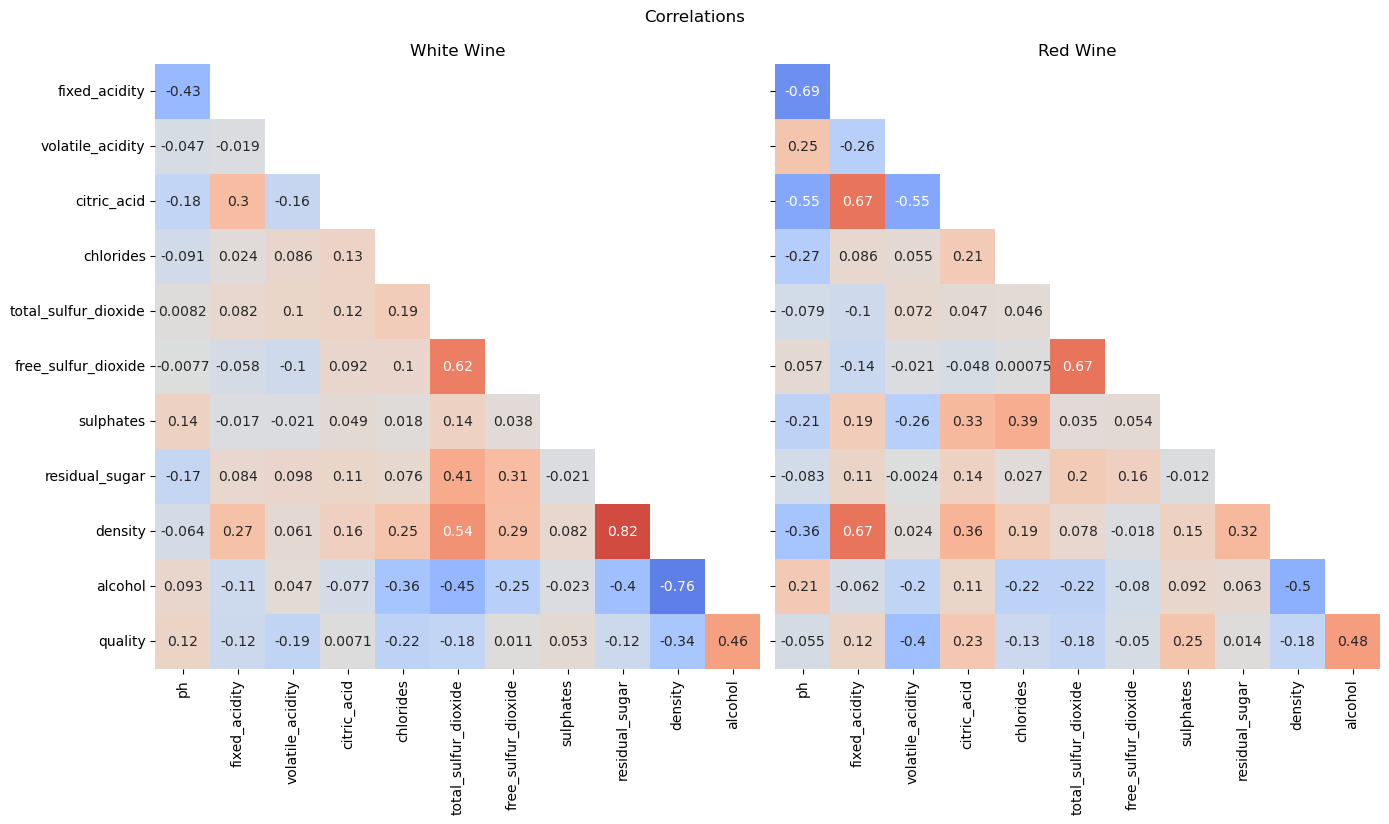

In [20]:
# plot correlation matrix for white wine
# TODO draw color bar
f, ax = plt.subplots(1, 2, figsize=(14, 8), sharex=True, sharey=True)

plt.suptitle('Correlations')

corr_w_plot = corr_w.drop(index='ph', columns='quality')
corr_r_plot = corr_r.drop(index='ph', columns='quality')

mask = np.triu(np.ones_like(corr_w_plot, dtype=bool), k=1) # same for red wine

sns.heatmap(corr_w_plot, mask=mask, annot=True, cmap='coolwarm', cbar=False, vmin=-1, vmax=1, square=True, ax=ax[0])
sns.heatmap(corr_r_plot, mask=mask, annot=True, cmap='coolwarm', cbar=False, vmin=-1, vmax=1, square=True, ax=ax[1])

ax[0].set_title('White Wine')
ax[1].set_title('Red Wine')

plt.tight_layout()

C:\Users\olive\AppData\Local\Temp\ipykernel_17836\1364656078.py:32: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend().remove()


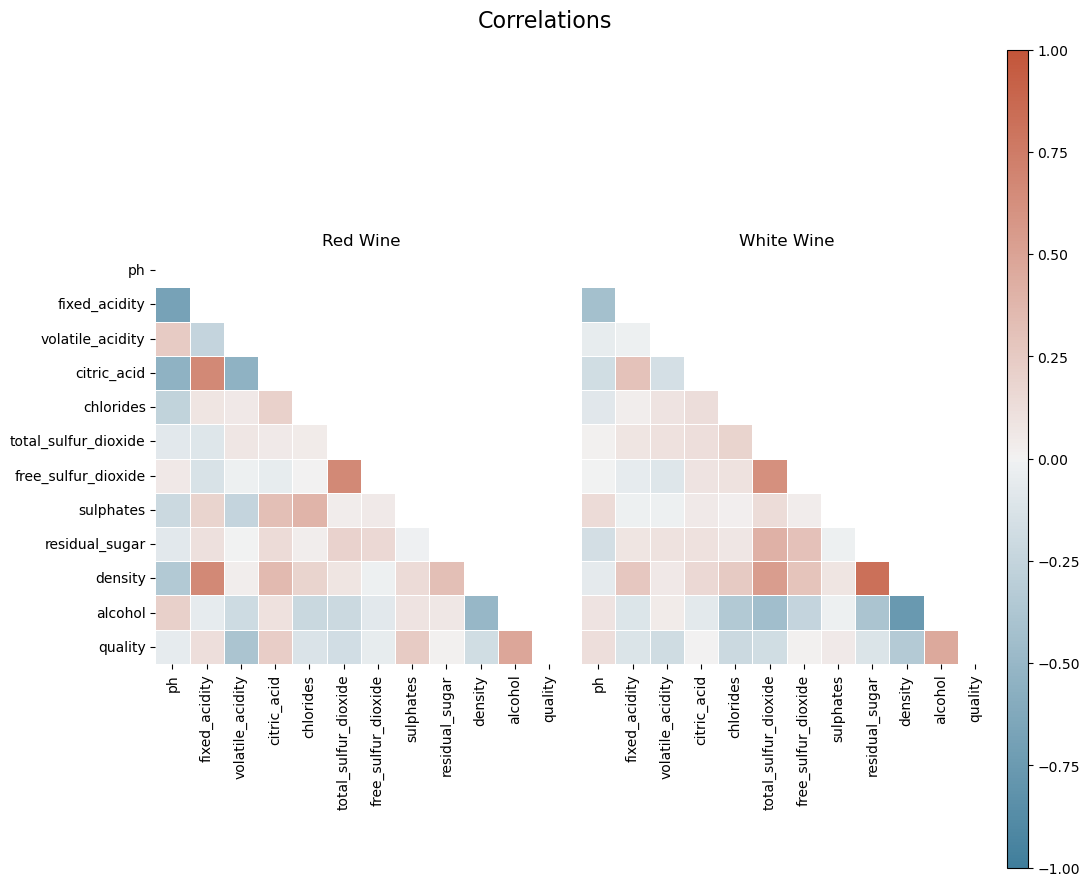

In [21]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_r, dtype=bool))

# Set up the matplotlib figure
fig, ax = plt.subplots(1, 3, figsize=(11, 9), gridspec_kw={"width_ratios":[1, 1, 0.05]})#,  sharex=True, sharey=True) # gridspec_kw={"width_ratios":[1, 1, 0.05]},
# ax = ax.flatten()

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
cplot_wine_r = sns.heatmap(corr_r, mask=mask, 
            cmap=cmap, vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},
            ax=ax[0],
            cbar=False
            )

cplot_wine_w = sns.heatmap(corr_w, mask=mask, 
            cmap=cmap, vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},
            ax=ax[1],
            cbar=False
            )

# settings red wine plot
ax[0].set_title('Red Wine')

# settings white wine plot
ax[1].set_title('White Wine')
ax[1].set_yticks([], labels=[])
plt.legend().remove()

# colorbar
# TODO - reduce height of colorbar
mappable = cplot_wine_r.get_children()[0] # TODO - what's the artist? what does this mean?
plt.colorbar(mappable, cax=ax[2], orientation = 'vertical')#, pad=0.2)

# # legend
# # Get all lines and labels from all axes
# handles = []
# labels = []
# for ax in fig.axes:
#     for h, l in zip(*ax.get_legend_handles_labels()):
#         handles.append(h)
#         labels.append(l)

# # Remove any existing legends from subplots
# for ax in fig.axes:
#     if ax.get_legend():
#         ax.get_legend().remove()

# # Create figure-level legend
# # fig.legend(handles, labels, loc='upper center', 
# #            bbox_to_anchor=(0.5, 1.1), ncol=2)

# fig
fig.suptitle('Correlations', fontsize=16)

plt.tight_layout()

Correlations are considered
- high if absolute value > 0.4
- medium if 0.2 < absolute value < 0.4
- low if absolute value < 0.2

### Observations from corr for white wines
- The input parameter correlation are low, except for 
  - the quantities that are somewhat related, e.g. pH and acidity, whereas there are exceptions!
  - fixed acidity and density
  - sulfur oxides
    - residual sugar
    - density
  - density
    - alcohol 
    - fixed acidity (pos, medium)
    - density
  - alcohol
    - density (neg, high) causal!
    - total sulfur oxide (neg, high)
    - chlorides (neg, high)
    - free sulfur oxide (neg, high)
    - residual sugar (neg, medium) causal!
- Quality correlations are
  - high
    - alcohol (positive correlation)
    - density (negative correlation), surprisingly not for residual sugar
  - medium
    - volatile acidity: negative
    - chlorides: negative
  - low
    - fixed acidity: negative
    - pH: positive
    - total sulfur dioxide: negative
    - residual sugar: negative

### Observations from corr for red wines
- The input parameter correlation are pretty weak, except for 
  - fixed acidity and citric acid strong correlation
  - fixed acidity and density strong correlation
  - volatile acidity and sulphates
  - citric acid and pH
  - citric acid and sulphates
  - pH and chlorides
  - pH and density
  - pH and alcohol
  - chlorides and sulphates
  - chlorides and density
  - chlorides and alcohol
  - sulfur dioxides and residual sugar
    - total sulfur dioxide and alcohol
  - density and alcohol
- Quality correlations
  - strong
    - alcohol: positive
  - medium
    - volatile acidity; negative
    - citric acid; positive
    - total sulfur dioxide, but not free; negative 
    - sulphates; positive
    - density: negative
  - weak >0.1
    - chlorides 

### Differences red and white
- input parameters
  - fixed acidity and volatile acidity: strong in red, weak in white
  - volatile acidity and sulphates: strong in red, weak in white
  - volatile acidity and alcohol: strong, negative in red, weak, positive in white
  - 

Questions on data set
- density and residual sugar correlate differently with the other quantities. Why? what does that mean? 
- What do the correlations between the input quantities mean?
- What is the meaning of sulphates in red wine?
- sulphates seem to be beneficial in red wines. 

### Further Considerations on Quality Correlations

In [22]:
# TODO quality is a discrete variable; how to calculate the correlation coefficient? use point biserial
# stats.pointbiserialr(wine_r['quality'], wine_r['alcohol'])

### Correlation without Outliers

In [23]:
# TODO analyse dem shit

# Plot Configuration

In [24]:
# plot configs
# TODO - how to transfer the config efficiently to the figures? 

# first, try a dictionary
wine_type_colors = {
    'red_wine'  :'red',
    'white_wine':'gray'
    }

quality_label_colors = {
    'low'   :'o',
    'medium':'g',
    'high'  :'b'
    }

input_param_colors = {
    'fixed_acidity'         : 'darkorange',
    'volatile_acidity'      : 'burlywood',
    'citric_acid'           : 'antiquewhite',
    'ph'                    : 'chocolate',
    'chlorides'             : 'turquoise',
    'free_sulfur_dioxide'   : 'khaki',
    'total_sulfur_dioxide'  : 'gold',
    'sulphates'             : 'yellow',
    'residual_sugar'        : 'crimson',
    'density'               : 'cornflowerblue',
    'alcohol'               : 'blueviolet'
}

# TODO second, try a class! Could be easier

# define variables; problem: in the end I will have many many variables in the space that I do not understand anymore
color_red = 'red'
color_white = 'gray'

# Wine Type Counts

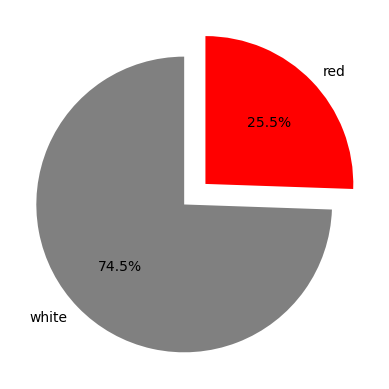

In [25]:
wine_types_count = wine.color.value_counts()

fig, ax = plt.subplots()
ax.pie(
    wine_types_count.values, labels=wine_types_count.index, 
    colors=[wine_type_colors['white_wine'], wine_type_colors['red_wine']],
    autopct='%1.1f%%',
    startangle=90,
    explode=(0.1, 0.1)#, 0, 1), (0.1, 0.1, 0, 1)]
    );

# Wine Quality

## Quality distribution

c:\Users\olive\anaconda3\envs\base_data_analysis\Lib\site-packages\numpy\ma\core.py:3463: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  _data[indx] = dval
c:\Users\olive\anaconda3\envs\base_data_analysis\Lib\site-packages\numpy\ma\core.py:3463: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  _data[indx] = dval


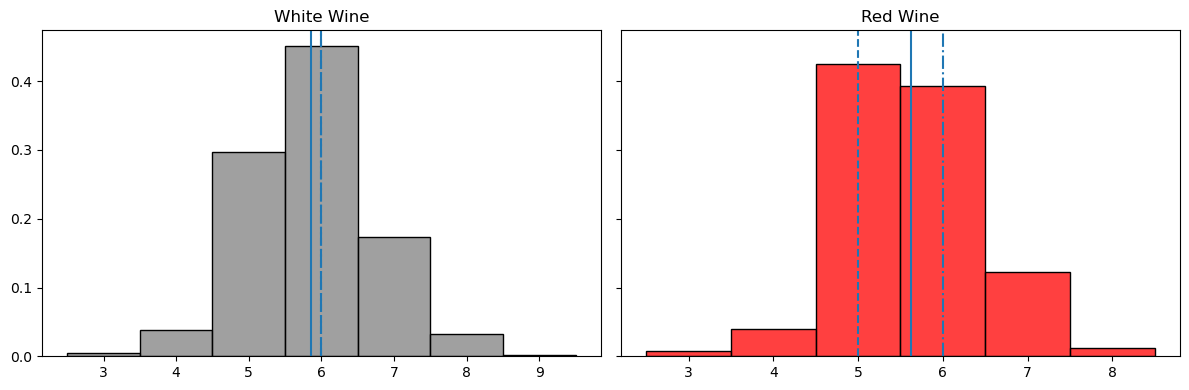

In [26]:
fig, ax = plt.subplots(1, 2, figsize=(12,4), sharey=True)

# NOTE draw bars in the middle of the value without gaps -> discrete=True
# NOTE kde does not make sense here, does it?
sns.histplot(wine_w.quality, ax=ax[0], color=color_white, discrete=True, stat='density') #, kde=True)
sns.histplot(wine_r.quality, ax=ax[1], color=color_red, discrete=True, stat='density') #, kde=True)

ax[0].set_title('White Wine')
ax[0].set_xlabel('')
ax[0].set_ylabel('')

ax[1].set_title('Red Wine')
ax[1].set_xlabel('')

# show average, median and mode
ylim = ax[0].get_ylim() # TODO find a way to skip this workaround
ax[0].vlines(
    [wine_w.quality.mean(), wine_w.quality.median(), wine_w.quality.mode()],
    ymin=ax[0].get_ylim()[0],
    ymax=ax[0].get_ylim()[1],
    linestyles=['solid', '-.', '--']
)
ax[0].set_ylim(ylim)

ylim=ax[1].get_ylim()
ax[1].vlines(
    [wine_r.quality.mean(), wine_r.quality.median(), wine_r.quality.mode()],
    ymin=ax[1].get_ylim()[0],
    ymax=ax[1].get_ylim()[1],
    linestyles=['solid', '-.', '--']
)
ax[1].set_ylim(ylim)

plt.tight_layout()

In [27]:
wine_w_top10 = wine_w.drop_duplicates(all_inputs).sort_values('quality', ascending=False).head(10)
wine_w_top10

,ph,fixed_acidity,volatile_acidity,citric_acid,chlorides,total_sulfur_dioxide,free_sulfur_dioxide,sulphates,residual_sugar,density,alcohol,quality,color,quality_label,total_sulfur_dioxide_above_eu_limit,volatile_acid_above_eu_limit,input_outlier_count
1605,3.37,7.1,0.260,0.49,0.032,113.0,31.0,0.42,2.20,0.99030,12.9,9,white,high,False,False,0
774,3.20,9.1,0.270,0.45,0.035,124.0,28.0,0.46,10.60,0.99700,10.4,9,white,high,False,False,0
827,3.28,7.4,0.240,0.36,0.031,139.0,27.0,0.48,2.00,0.99055,12.5,9,white,high,False,False,0
820,3.41,6.6,0.360,0.29,0.021,85.0,24.0,0.61,1.60,0.98965,12.4,9,white,high,False,False,0
876,3.28,6.9,0.360,0.34,0.018,119.0,57.0,0.36,4.20,0.98980,12.7,9,white,high,False,False,0
4786,3.46,4.4,0.320,0.39,0.030,127.0,31.0,0.36,4.30,0.98904,12.8,8,white,high,False,False,0
22,3.47,6.8,0.260,0.42,0.049,122.0,41.0,0.48,1.70,0.99300,10.5,8,white,high,False,False,0
4787,3.57,3.9,0.225,0.40,0.030,118.0,29.0,0.36,4.20,0.98900,12.8,8,white,high,False,False,0
17,3.33,6.2,0.660,0.48,0.029,75.0,29.0,0.39,1.20,0.98920,12.8,8,white,high,False,False,0
2774,3.09,7.0,0.360,0.32,0.045,131.0,37.0,0.33,10.05,0.99352,11.7,8,white,high,False,False,0


In [28]:
wine_w_norm_top10 = wine_w_norm.drop_duplicates(all_inputs).sort_values('quality', ascending=False).head(16)
wine_w_norm_top10

,ph,fixed_acidity,volatile_acidity,citric_acid,chlorides,total_sulfur_dioxide,free_sulfur_dioxide,sulphates,residual_sugar,density,alcohol,quality,quality_label
1605,0.590909,0.317308,0.176471,0.295181,0.068249,0.241299,0.101045,0.232558,0.024540,0.061500,0.790323,9,high
774,0.436364,0.509615,0.186275,0.271084,0.077151,0.266821,0.090592,0.279070,0.153374,0.190669,0.387097,9,high
827,0.509091,0.346154,0.156863,0.216867,0.065282,0.301624,0.087108,0.302326,0.021472,0.066320,0.725806,9,high
820,0.627273,0.269231,0.274510,0.174699,0.035608,0.176334,0.076655,0.453488,0.015337,0.048969,0.709677,9,high
876,0.509091,0.298077,0.274510,0.204819,0.026706,0.255220,0.191638,0.162791,0.055215,0.051860,0.758065,9,high
4786,0.672727,0.057692,0.235294,0.234940,0.062315,0.273782,0.101045,0.162791,0.056748,0.037208,0.774194,8,high
22,0.681818,0.288462,0.176471,0.253012,0.118694,0.262181,0.135889,0.302326,0.016871,0.113553,0.403226,8,high
4787,0.772727,0.009615,0.142157,0.240964,0.062315,0.252900,0.094077,0.162791,0.055215,0.036437,0.774194,8,high
17,0.554545,0.230769,0.568627,0.289157,0.059347,0.153132,0.094077,0.197674,0.009202,0.040293,0.774194,8,high
2774,0.336364,0.307692,0.274510,0.192771,0.106825,0.283063,0.121951,0.127907,0.144939,0.123578,0.596774,8,high


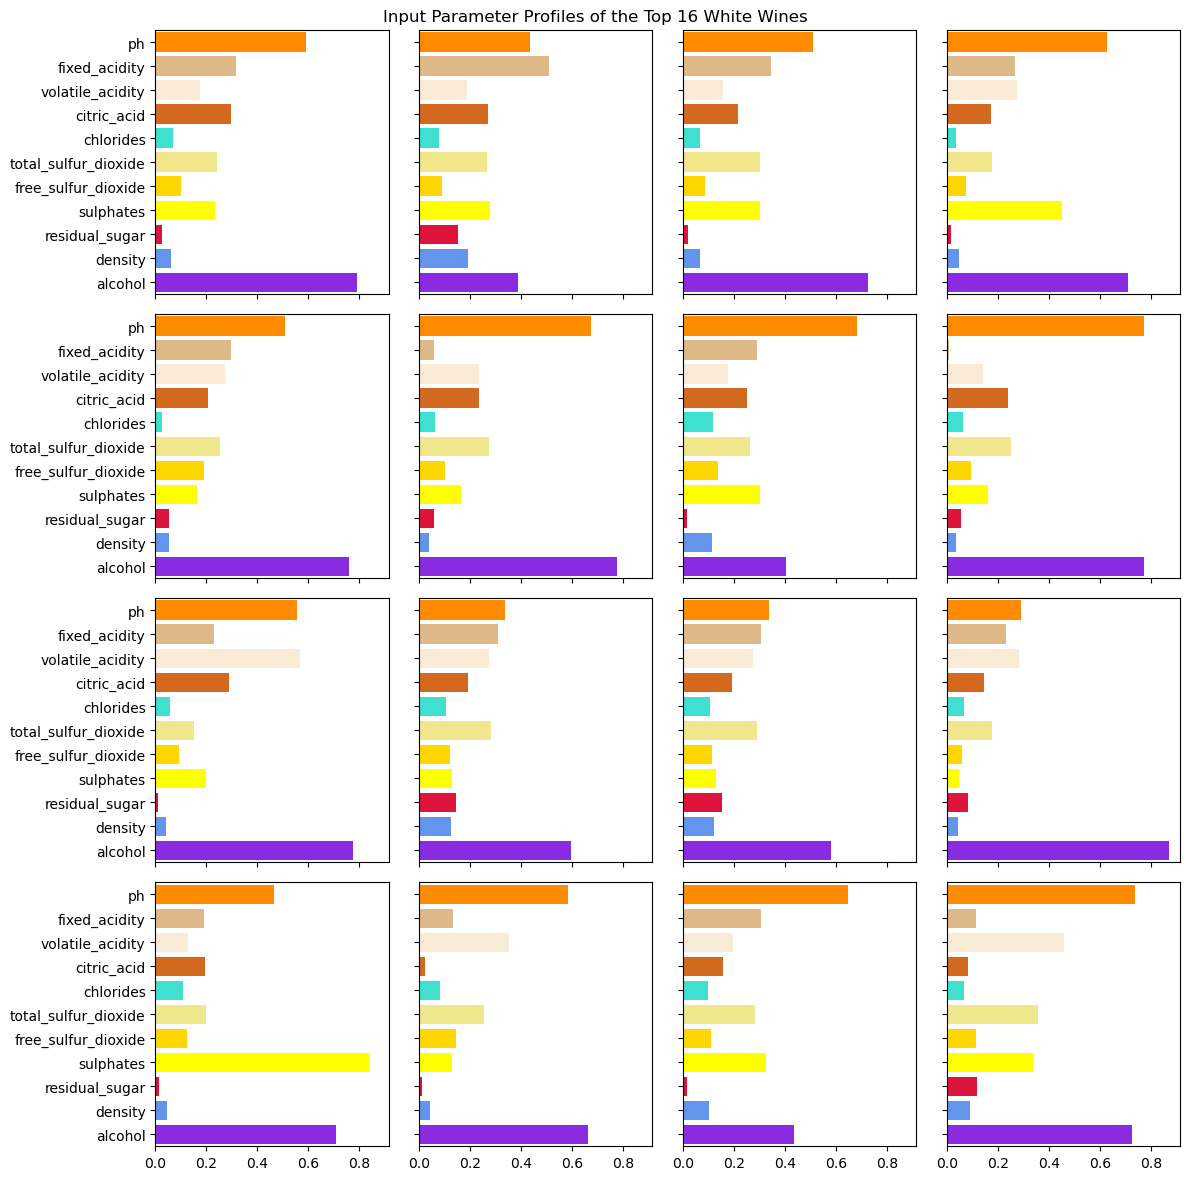

In [29]:
# plot physiochemical profile of the top wines
fig,ax = plt.subplots(4,4, figsize=(12,12), sharex=True, sharey=True)
ax = ax.flatten()

plt.suptitle('Input Parameter Profiles of the Top 16 White Wines')

for w, a in zip(wine_w_norm_top10[all_inputs].values, ax):
   #  print(w)
   sns.barplot(y=all_inputs, x=w, ax=a, orient='h')
   #  sns.barplot(x=all_inputs, y=w, ax=a, orient='v')
   #  a.tick_params(axis='x', labelrotation=90)

   for bars in a.containers:
      for bar, color in zip(bars, input_param_colors.values()):
         bar.set_facecolor(color)

# take away the spines
# sns.despine()

plt.tight_layout()

#### White Wine Quality Distribution
  - avg: 5.8. avg=median, mode: 6
  - slighty negatively skewed, almost symmetric distribution
  - conclusion
    - Kind of normally distributed data set
    - sample: average wine years, wines meet the expectations, maybe slightly more bad wines
    - tasters: testing might not be symmetric
    - good representation of sample and testers

#### Red Wine Quality Distribution
  - avg: 5.6, median: 6, mode: 5
  - more shifted to lower ratings
  - skew unclear: positively skewed?
  - conclusions
    - Kind of normally distributed data set
    - sample: wine could be from relatively bad years
    - tasters: testing might not be symmetric
    - good representation of sample and testers

## Quality Label distribution

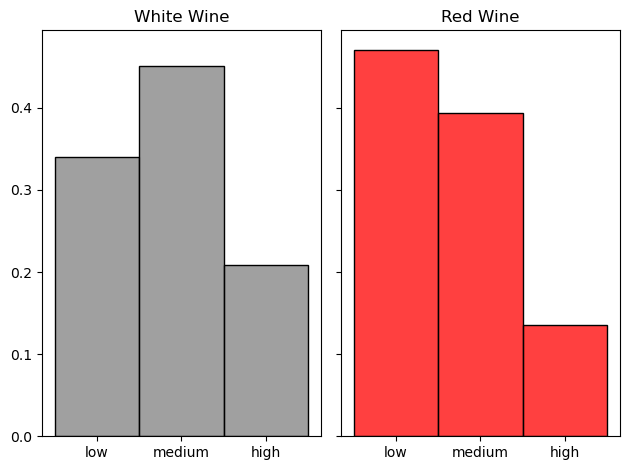

In [30]:
fig, ax = plt.subplots(1, 2, sharex=True, sharey=True)

sns.histplot(wine_w.quality_label, ax=ax[0], color=color_white, stat="density") # NOTE stat = density for normalization
sns.histplot(wine_r.quality_label, ax=ax[1], color=color_red, stat="density")

ax[0].set_title('White Wine')
ax[0].set_xlabel('')
ax[0].set_ylabel('')

ax[1].set_title('Red Wine')
ax[1].set_xlabel('')

plt.tight_layout()

In [31]:
wine_r.quality_label.value_counts()

quality_label
low       640
medium    535
high      184
Name: count, dtype: int64

In [32]:
wine_w.quality_label.value_counts()

quality_label
medium    1788
low       1348
high       825
Name: count, dtype: int64

Questions: 
- move the quality label?
- create a new quality label based on the high quality wines? 

Follow-Up Tasks
- Investigate high quality wines for similarities in chemical composition. Is there a composition that convinced the testers the most?
-  

## Alcohol vs. Wine Quality

### Quality Rating

<Axes: xlabel='quality', ylabel='alcohol'>

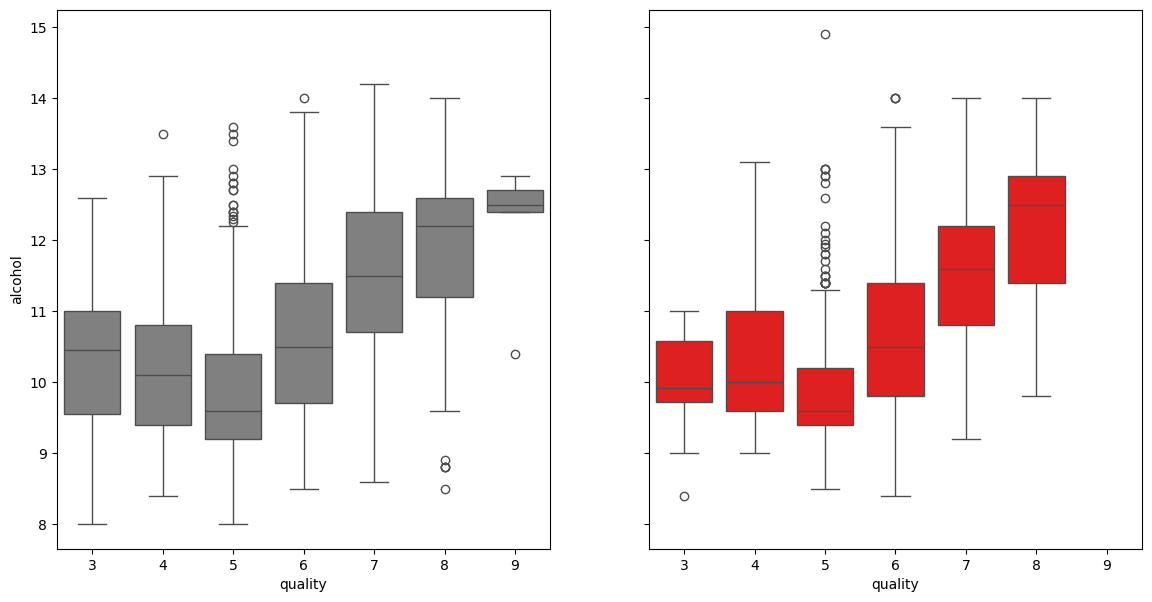

In [33]:
fig, ax = plt.subplots(1, 2, figsize=(14,7), sharex=True, sharey=True)

sns.boxplot(wine_w, y='alcohol', x='quality', color=wine_type_colors['white_wine'], ax=ax[0])
sns.boxplot(wine_r, y='alcohol', x='quality', color=wine_type_colors['red_wine'  ], ax=ax[1])

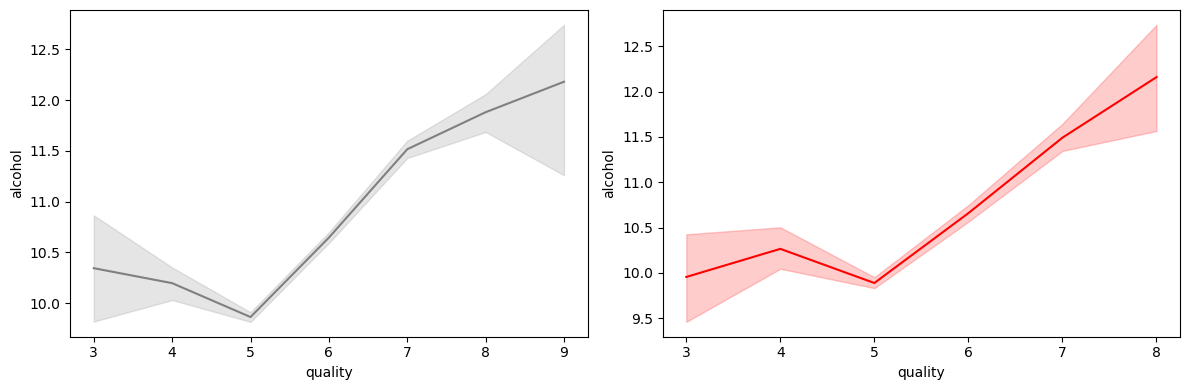

In [34]:
# TODO plot the averages and std
fig, ax = plt.subplots(1, 2, figsize=(12,4))

sns.lineplot(wine_w, x='quality', y='alcohol', color=wine_type_colors['white_wine'], ax=ax[0])
sns.lineplot(wine_r, x='quality', y='alcohol', color=wine_type_colors['red_wine'], ax=ax[1])

plt.tight_layout()

- Alcohol content is an indicator of good wine, however it's not decisive, because low quality wines also have a high alcohol content
- Alcohol, Alcohol and Residual Sugar are indicators of the fermentation process.
- Usually 50% of the input sugar can be turned into alcohol before fermentation stops.

#### Questions
- Is there a reason for this distribution?

#### Tasks
- Investigate the increase from rating of 5; cut out the bad wines, to find out a what's a good wine.

### Quality Labels

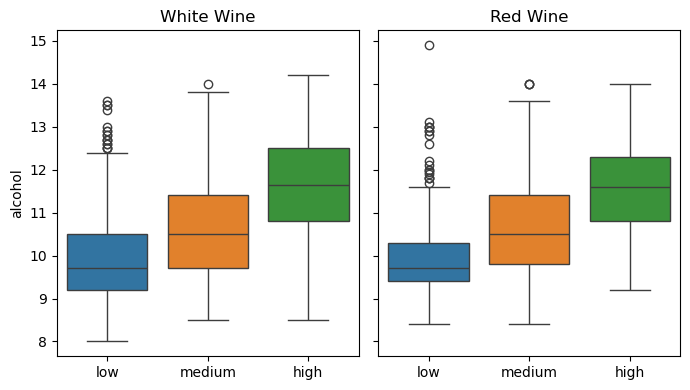

In [35]:
fig, ax = plt.subplots(1, 2, figsize=(7,4), sharex=True, sharey=True)
ax = ax.flatten()

# sns.boxplot(wine_r, x='quality', y='alcohol', ax=ax[0])
# sns.boxplot(wine_w, x='quality', y='alcohol', ax=ax[1])
sns.boxplot(wine_w, x='quality_label', y='alcohol', hue='quality_label', ax=ax[0])
sns.boxplot(wine_r, x='quality_label', y='alcohol', hue='quality_label', ax=ax[1])

ax[0].set_title('White Wine')
ax[0].set_xlabel('')

ax[1].set_title('Red Wine')
ax[1].set_xlabel('')

plt.tight_layout()

### Hypothesis Testing with Kruskal-Wallis, Welch ANOVA, ANOVA 

In [36]:
# test if ANOVA assumptions are met
print('Data should be normally distributed: ', pg.normality(wine_w, dv='alcohol', group='quality_label'))
print()
print('Variances should be similar: ', wine_w.groupby('quality_label').alcohol.var())

Data should be normally distributed:                        W          pval  normal
quality_label                                
medium         0.971576  2.504234e-18   False
low            0.934381  6.742571e-24   False
high           0.982352  2.010498e-08   False

Variances should be similar:  quality_label
low       0.802089
medium    1.273287
high      1.304304
Name: alcohol, dtype: float64


C:\Users\olive\AppData\Local\Temp\ipykernel_17836\2586318921.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print('Variances should be similar: ', wine_w.groupby('quality_label').alcohol.var())


In [37]:
# use Welch ANOVA
pg.welch_anova(wine_w, dv='alcohol', between='quality_label')

,Source,ddof1,ddof2,F,p-unc,np2
0,quality_label,2,2091.055612,673.923733,1.285780e-226,0.244691


In [564]:
f,p = stats.kruskal(
    wine_w.loc[wine_w.quality_label=='low', 'alcohol'],
    wine_w.loc[wine_w.quality_label=='medium', 'alcohol'],
    wine_w.loc[wine_w.quality_label=='high', 'alcohol']
)

print(f,p)

941.3599905563561 3.8572279800266753e-205


In [565]:
# for comparison: ANOVA TEST on quality label and alcohol content
f,p = stats.f_oneway(
    wine_w.loc[wine_w.quality_label=='low', 'alcohol'],
    wine_w.loc[wine_w.quality_label=='medium', 'alcohol'],
    wine_w.loc[wine_w.quality_label=='high', 'alcohol']
)

print(f, p)

641.121149847369 6.4302809964773026e-242


### Conclusions on quality distribution

- High quality wines tend to have a higher alcohol content.
- The range is however very large.
- Although there is a strong, positive correlation between quality alcohol, the outliers show that this is not a conclusive measure for quality.
- Medium quality wines have a low alcohol content, but there are many outliers with a very high alcohol content in this group.

Questions
- What are the features of medium quality wines?
- How do wines get a high alcohol content?
  - yeast turns sugar into alcohol and ??? 
  - residual sugar -> sweetness
  - What about density?
  - acidity

## Density vs. Wine Quality 

<Axes: xlabel='quality', ylabel='density'>

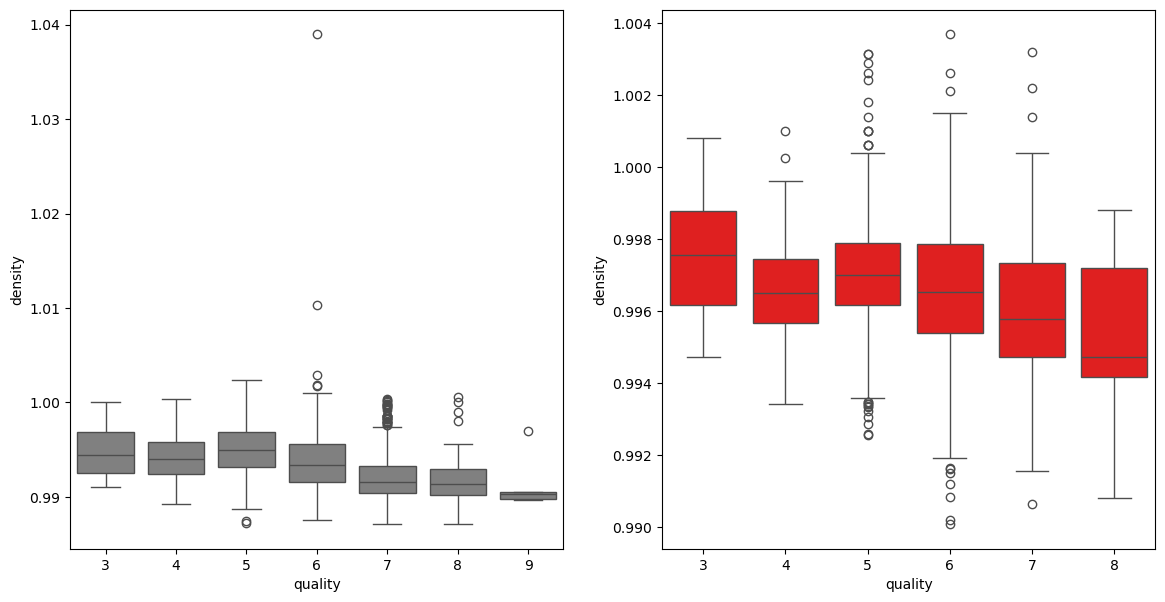

In [566]:
fig, ax = plt.subplots(1, 2, figsize=(14,7))

sns.boxplot(wine_w, x='quality', y='density', color=wine_type_colors['white_wine'], ax=ax[0])
sns.boxplot(wine_r, x='quality', y='density', color=wine_type_colors['red_wine'], ax=ax[1])

# new_ylim = [ax[1].get_ylim()[0], ax[0].get_ylim()[1]]
# ax[0].set_ylim(new_ylim)
# ax[1].set_ylim(new_ylim)

In [567]:
wine_w.loc[wine_w.density.sort_values(ascending=False).index, :].head()

,ph,fixed_acidity,volatile_acidity,citric_acid,chlorides,total_sulfur_dioxide,free_sulfur_dioxide,sulphates,residual_sugar,density,alcohol,quality,color,quality_label,total_sulfur_dioxide_above_eu_limit,volatile_acid_above_eu_limit,input_outlier_count
2781,3.39,7.8,0.965,0.60,0.074,160.0,8.0,0.69,65.80,1.03898,11.7,6,white,medium,False,False,5
1653,3.15,7.9,0.330,0.28,0.053,176.0,35.0,0.38,31.60,1.01030,8.8,6,white,medium,False,False,2
3619,3.06,6.8,0.450,0.28,0.031,122.0,27.0,0.42,26.05,1.00295,10.6,6,white,medium,False,False,2
2334,3.44,7.5,0.230,0.35,0.058,212.0,128.0,0.43,17.80,1.00241,8.9,5,white,low,True,False,2
1608,2.98,6.9,0.270,0.49,0.057,235.0,59.0,0.47,23.50,1.00240,8.6,5,white,low,True,False,2


Question:
- What is wine density? 

## Residual Sugar vs. Wine Quality 

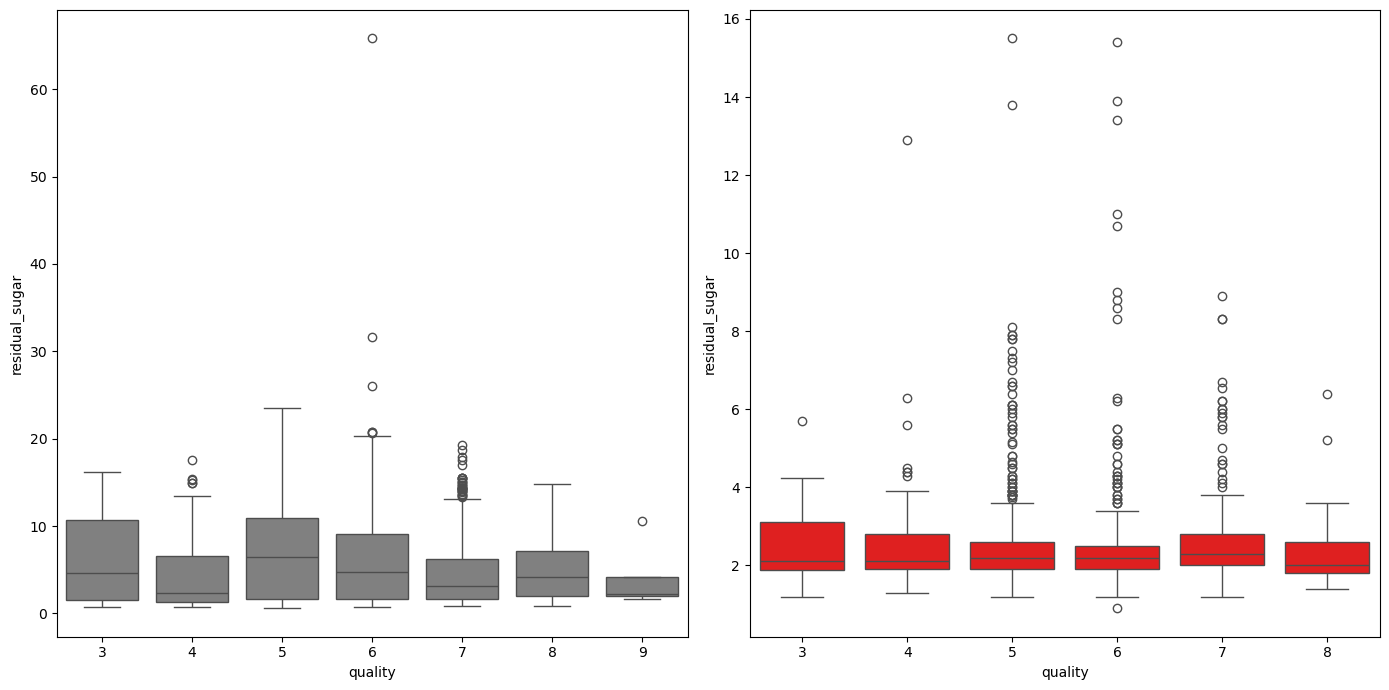

In [568]:
fig, ax = plt.subplots(1, 2, figsize=(14,7))

sns.boxplot(wine_w, y='residual_sugar', x='quality', color=wine_type_colors['white_wine'], ax=ax[0])
sns.boxplot(wine_r, y='residual_sugar', x='quality', color=wine_type_colors['red_wine'], ax=ax[1])

plt.tight_layout()

## Sulphates vs. Wine Quality

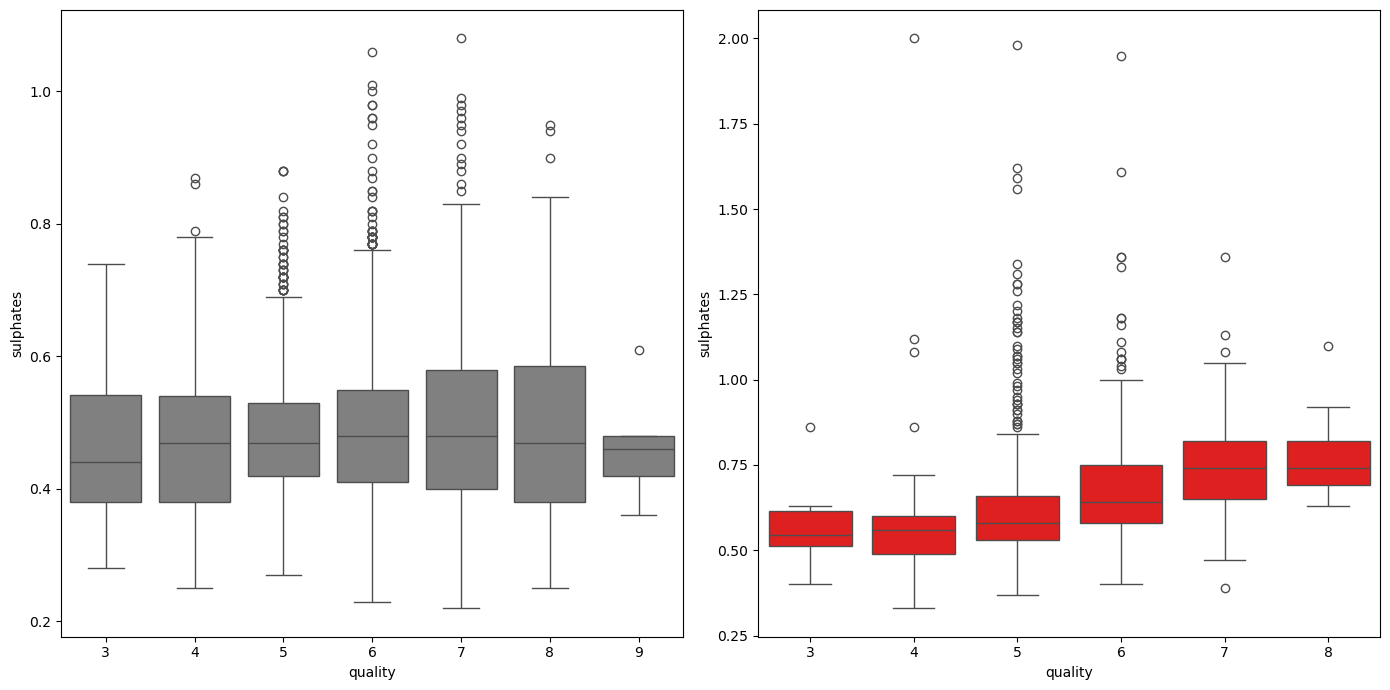

In [569]:
fig, ax = plt.subplots(1, 2, figsize=(14,7))

sns.boxplot(wine_w, x='quality', y='sulphates', color=wine_type_colors['white_wine'], ax=ax[0])
sns.boxplot(wine_r, x='quality', y='sulphates', color=wine_type_colors['red_wine'], ax=ax[1])

plt.tight_layout()

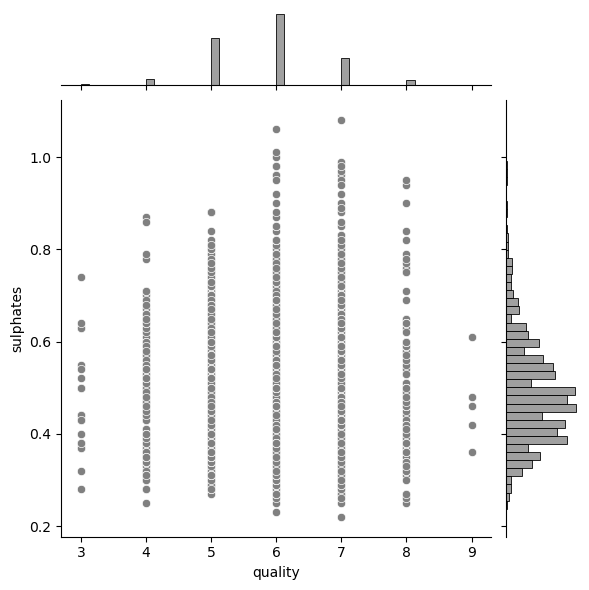

In [570]:
# fig, ax = plt.subplots(1, 2)

jg = sns.jointplot(data=wine_w, x="quality", y="sulphates", color=wine_type_colors['white_wine'])

# plt.tight_layout()

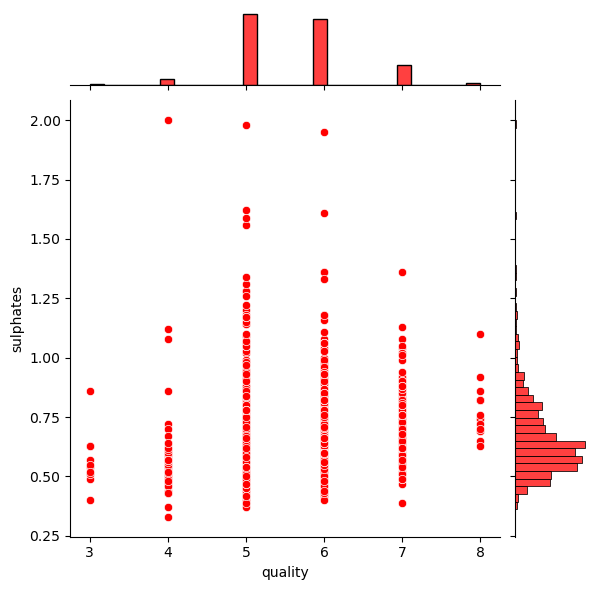

In [571]:
sns.jointplot(data=wine_r, x="quality", y="sulphates", color=wine_type_colors['red_wine'])

## Fixed Acidity vs. Wine Quality

<Axes: xlabel='quality', ylabel='fixed_acidity'>

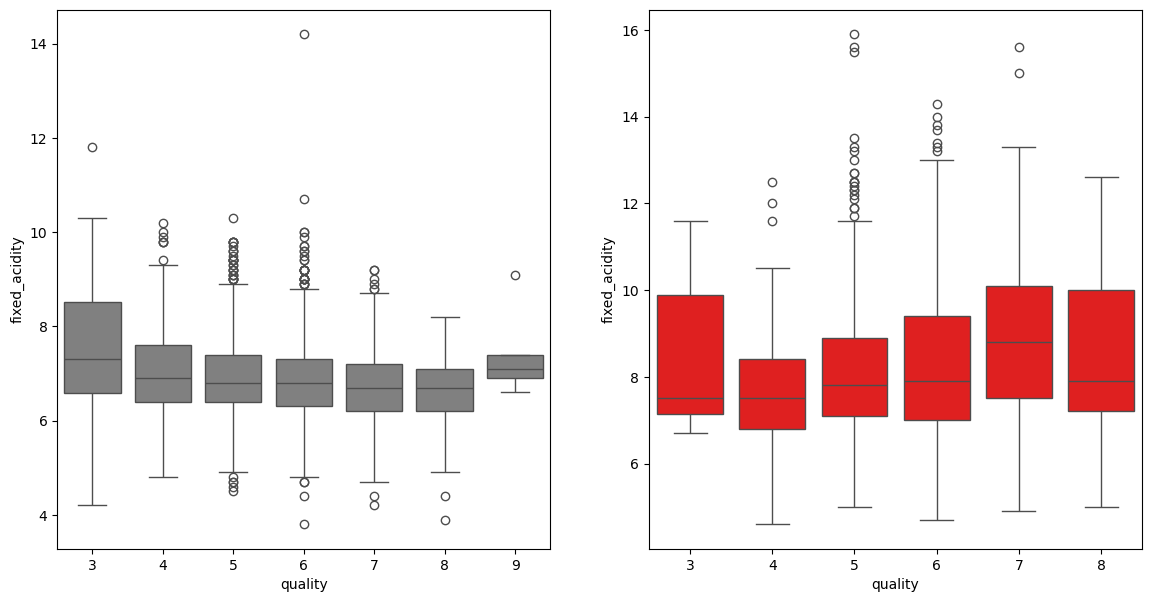

In [572]:
fig, ax = plt.subplots(1, 2, figsize=(14,7))

sns.boxplot(wine_w, x='quality', y='fixed_acidity', color=wine_type_colors['white_wine'], ax=ax[0])
sns.boxplot(wine_r, x='quality', y='fixed_acidity', color=wine_type_colors['red_wine'], ax=ax[1])

## Volatile Acidity vs. Wine Quality

<Axes: xlabel='quality', ylabel='volatile_acidity'>

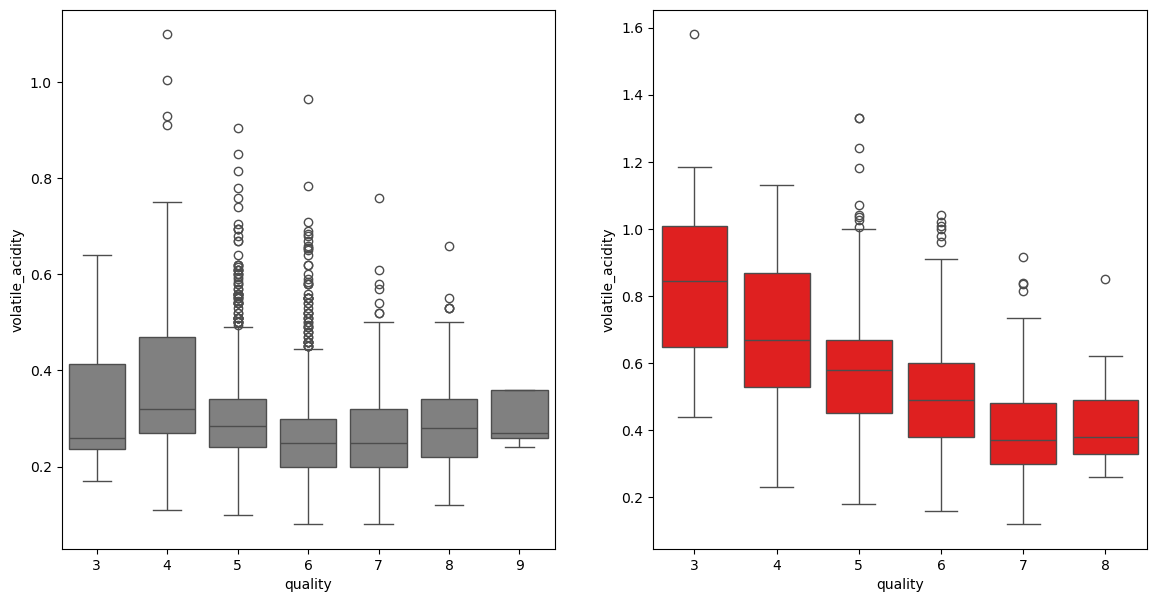

In [573]:
fig, ax = plt.subplots(1, 2, figsize=(14,7))

sns.boxplot(wine_w, x='quality', y='volatile_acidity', color=wine_type_colors['white_wine'], ax=ax[0])
sns.boxplot(wine_r, x='quality', y='volatile_acidity', color=wine_type_colors['red_wine'], ax=ax[1])

<Axes: xlabel='quality', ylabel='volatile_acidity'>

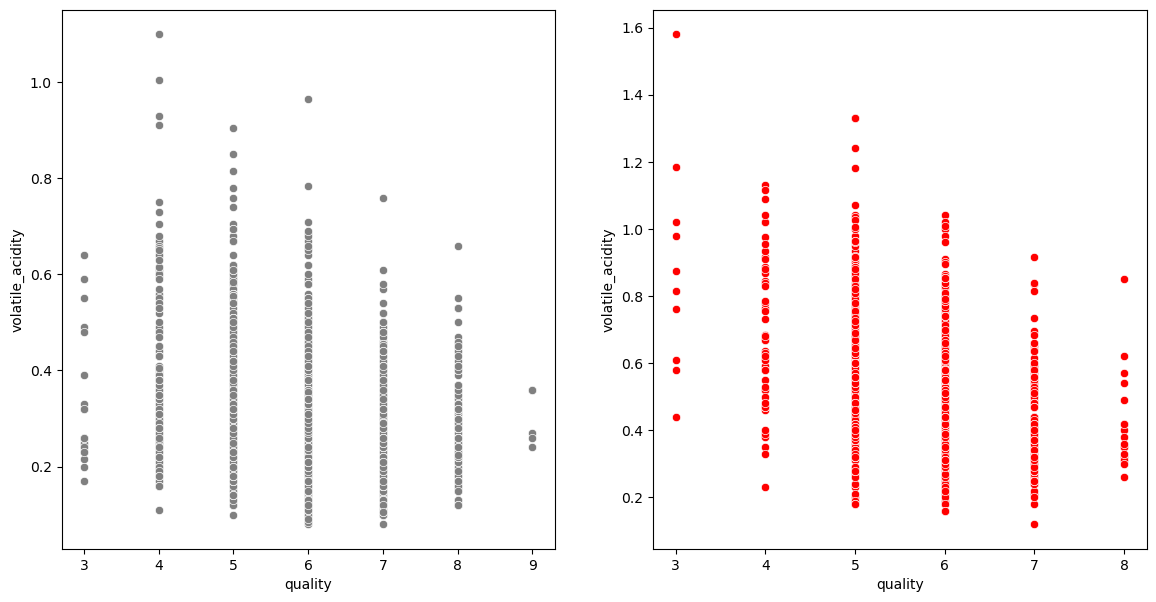

In [574]:
fig, ax = plt.subplots(1, 2, figsize=(14,7))

sns.scatterplot(wine_w, x='quality', y='volatile_acidity', color=wine_type_colors['white_wine'], ax=ax[0])
sns.scatterplot(wine_r, x='quality', y='volatile_acidity', color=wine_type_colors['red_wine'], ax=ax[1])

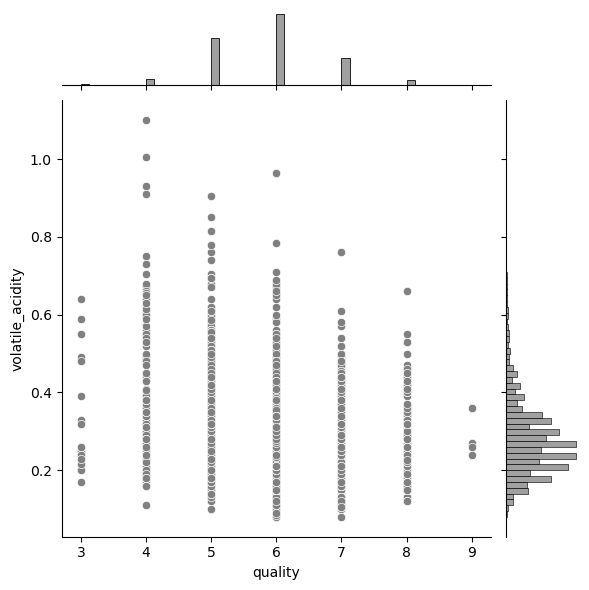

In [575]:
sns.jointplot(data=wine_w, x="quality", y="volatile_acidity", color=wine_type_colors['white_wine'])

## Chlorides vs Wine Quality

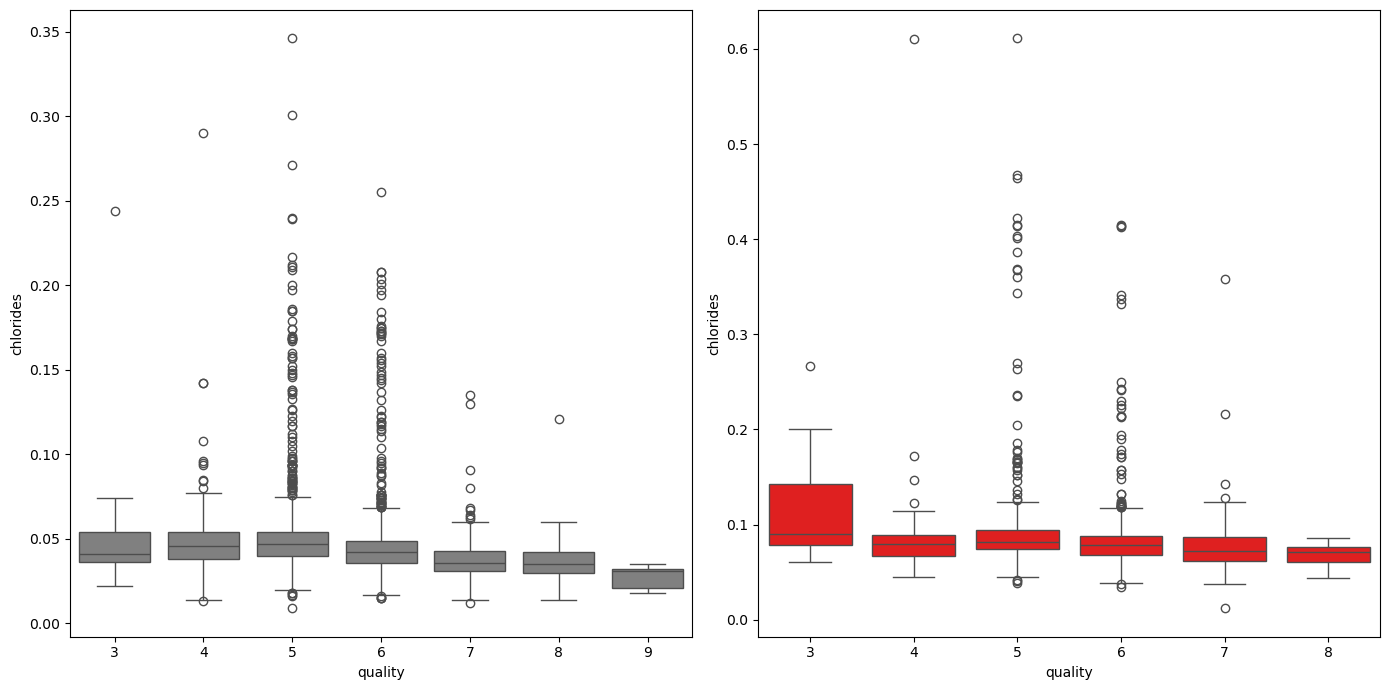

In [576]:
fig, ax = plt.subplots(1, 2, figsize=(14,7))

sns.boxplot(wine_w, x='quality', y='chlorides', color=wine_type_colors['white_wine'], ax=ax[0])
sns.boxplot(wine_r, x='quality', y='chlorides', color=wine_type_colors['red_wine'], ax=ax[1])

plt.tight_layout()

## pH vs Wine Quality

<Axes: xlabel='quality', ylabel='ph'>

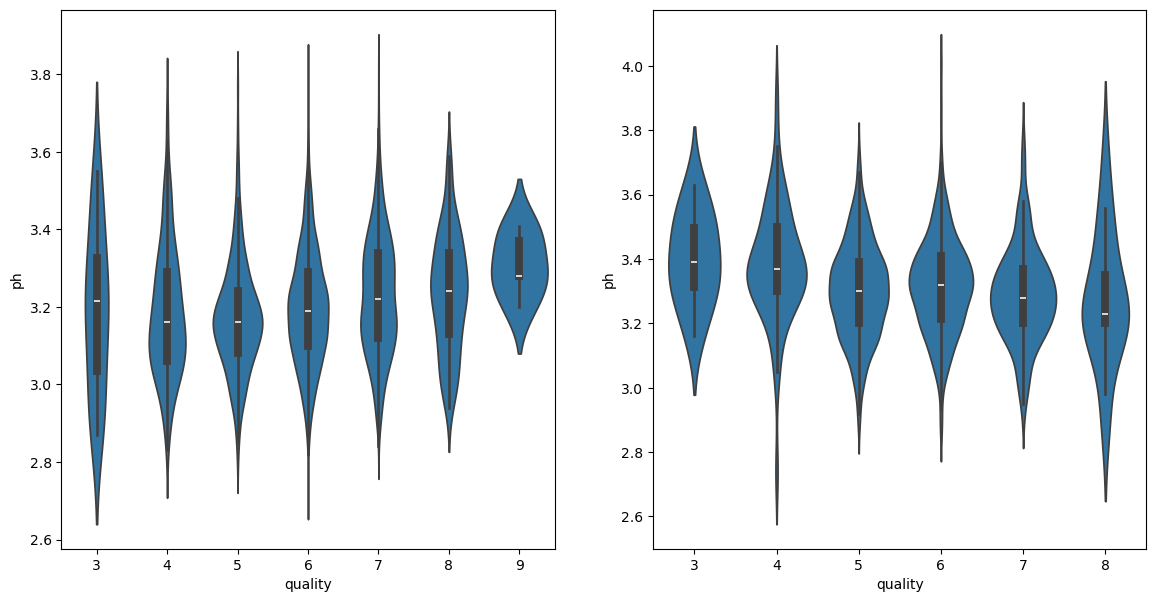

In [577]:
fig, ax = plt.subplots(1, 2, figsize=(14,7))

sns.violinplot(wine_w, x='quality', y='ph', ax=ax[0])
sns.violinplot(wine_r, x='quality', y='ph', ax=ax[1])

### pH vs residual sugar vs wine quality

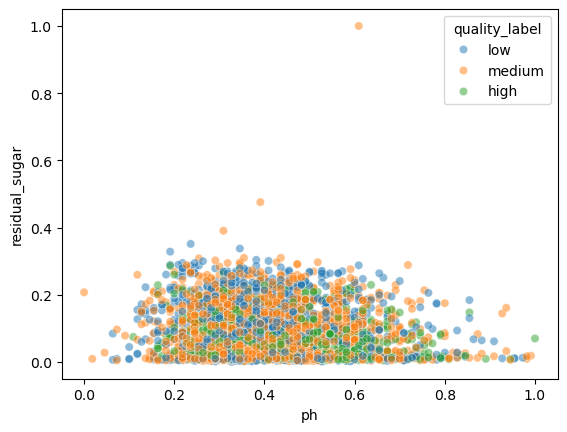

In [578]:
ax = sns.scatterplot(
    wine_w_norm,
    y='residual_sugar',
    x='ph',
    hue='quality_label',
    alpha=0.5
)

# ax.set_ylim([0, 40])

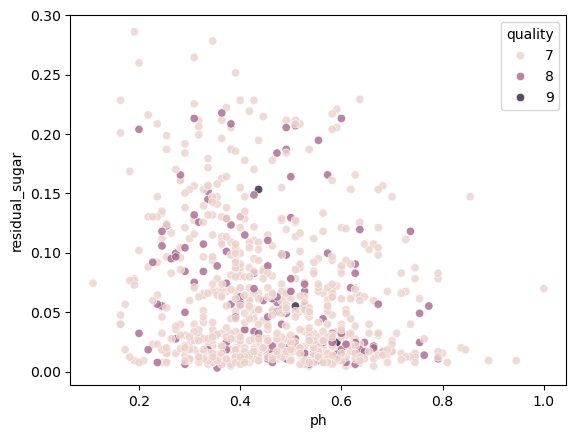

In [579]:
ax = sns.scatterplot(
    wine_w_norm[wine_w_norm.quality>6],
    y='residual_sugar',
    x='ph',
    hue='quality',
    alpha=0.8
)

# ax.set_ylim([0, 40])

## High Quality Wines

In [580]:
wine_w_hq = wine_w[wine_w.quality_label == 'high']

In [581]:
# TODO What does this mean? Does this make sense? 

corr_wine_w_hq = wine_w_hq.corr(numeric_only=True)
corr_wine_w_hq

,ph,fixed_acidity,volatile_acidity,citric_acid,chlorides,total_sulfur_dioxide,free_sulfur_dioxide,sulphates,residual_sugar,density,alcohol,quality,total_sulfur_dioxide_above_eu_limit,volatile_acid_above_eu_limit,input_outlier_count
ph,1.000000,-0.469355,-0.015866,-0.123149,-0.005625,0.067489,0.022349,0.169254,-0.228151,-0.027568,-0.025572,0.029241,-0.040026,NaN,0.148744
fixed_acidity,-0.469355,1.000000,-0.080262,0.280367,0.130399,0.144652,-0.007175,-0.084640,0.186042,0.407484,-0.245798,-0.013092,0.075461,NaN,-0.175387
volatile_acidity,-0.015866,-0.080262,1.000000,-0.257015,-0.244204,-0.056685,-0.174659,-0.044376,0.058535,-0.244071,0.481152,0.086147,-0.036155,NaN,0.139259
citric_acid,-0.123149,0.280367,-0.257015,1.000000,0.146581,0.153572,0.136268,-0.065125,0.087101,0.190747,-0.169250,0.051018,0.033749,NaN,-0.027251
chlorides,-0.005625,0.130399,-0.244204,0.146581,1.000000,0.293577,0.174575,0.065868,0.122284,0.400154,-0.474269,-0.051524,0.104232,NaN,0.115169
total_sulfur_dioxide,0.067489,0.144652,-0.056685,0.153572,0.293577,1.000000,0.562222,0.030141,0.349549,0.490807,-0.352268,-0.005749,0.266130,NaN,0.072136
free_sulfur_dioxide,0.022349,-0.007175,-0.174659,0.136268,0.174575,0.562222,1.000000,0.149860,0.108153,0.171784,-0.181832,0.041547,0.095707,NaN,0.198654
sulphates,0.169254,-0.084640,-0.044376,-0.065125,0.065868,0.030141,0.149860,1.000000,-0.112990,0.059938,-0.077885,-0.050274,0.005357,NaN,0.387899
residual_sugar,-0.228151,0.186042,0.058535,0.087101,0.122284,0.349549,0.108153,-0.112990,1.000000,0.748659,-0.315704,0.045123,0.156393,NaN,-0.049951
density,-0.027568,0.407484,-0.244071,0.190747,0.400154,0.490807,0.171784,0.059938,0.748659,1.000000,-0.794740,-0.051012,0.201632,NaN,-0.031673


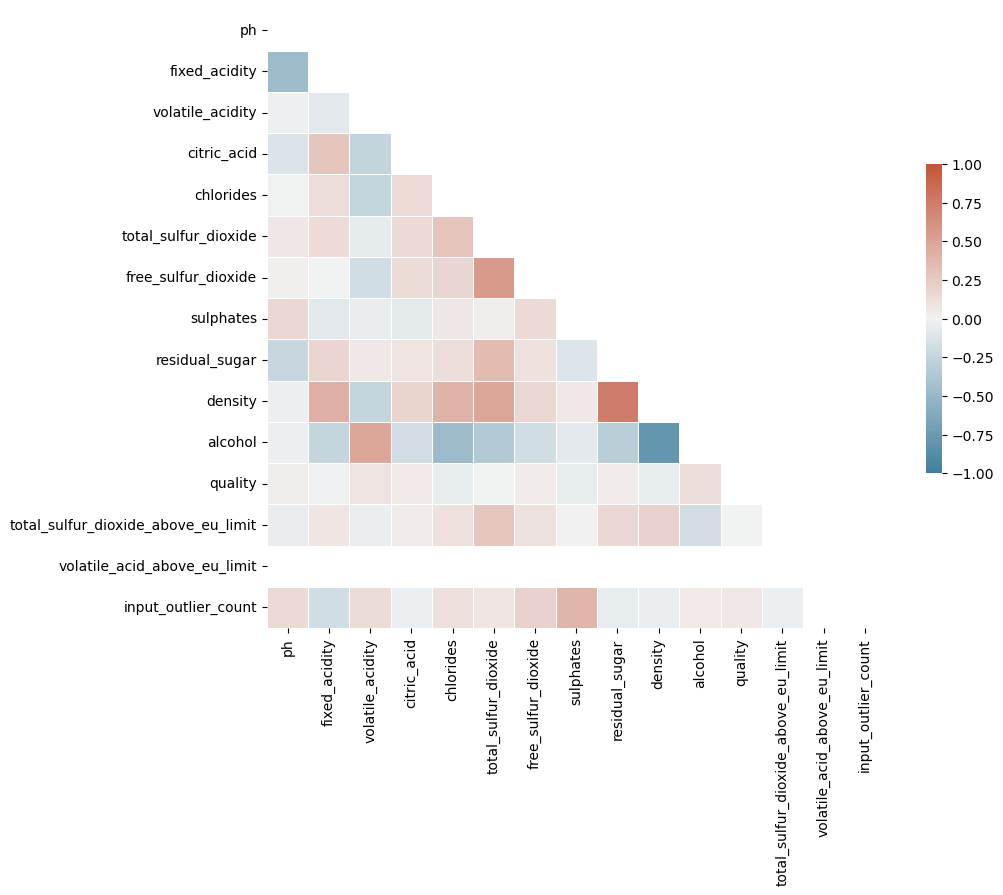

In [582]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_wine_w_hq, dtype=bool))

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(11, 9))#,  sharex=True, sharey=True) # gridspec_kw={"width_ratios":[1, 1, 0.05]},
# ax = ax.flatten()

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio

cplot_wine_w = sns.heatmap(corr_wine_w_hq, mask=mask, 
            cmap=cmap, vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},
            cbar=True
            )

plt.tight_layout()

Very low quality correlations! So, from the inputs one cannot really say if a wine is high quality. 

# Inputs

## Fixed Acidity

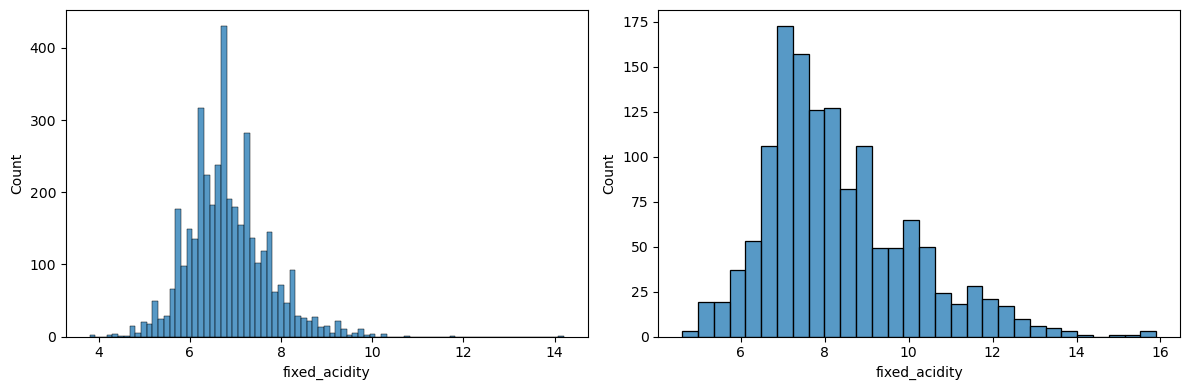

In [583]:
fig, ax = plt.subplots(1, 2, figsize=(12,4))#, sharey=True)

sns.histplot(wine_w, x='fixed_acidity', ax=ax[0])
sns.histplot(wine_r, x='fixed_acidity', ax=ax[1])

plt.tight_layout()

## Volatile Acidity

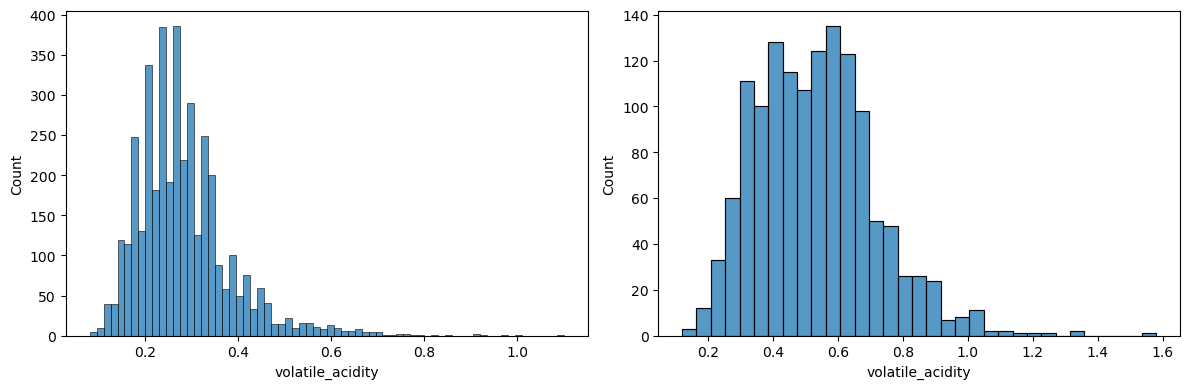

In [584]:
fig, ax = plt.subplots(1, 2, figsize=(12,4))#, sharey=True)

sns.histplot(wine_w, x='volatile_acidity', ax=ax[0])
sns.histplot(wine_r, x='volatile_acidity', ax=ax[1])

plt.tight_layout()

## Citric Acid

<Axes: xlabel='citric_acid', ylabel='Count'>

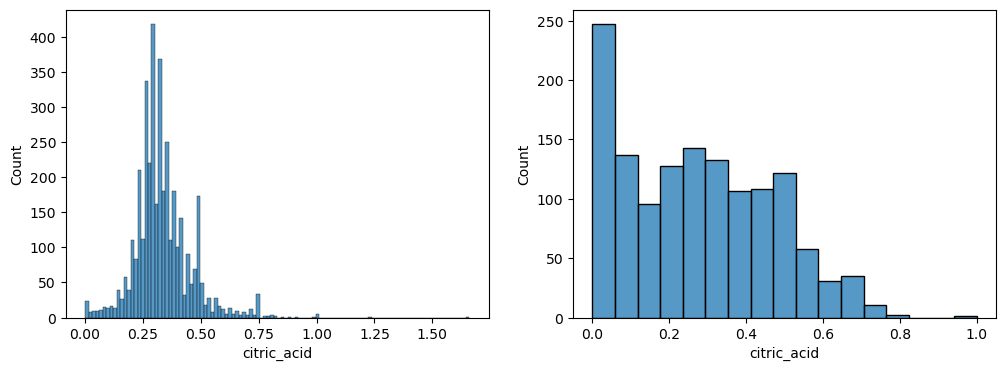

In [585]:
fig, ax = plt.subplots(1, 2, figsize=(12,4))#, sharey=True)

sns.histplot(wine_w, x='citric_acid', ax=ax[0])
sns.histplot(wine_r, x='citric_acid', ax=ax[1])

In [586]:
pg.normality(wine_w.citric_acid)

,W,pval,normal
citric_acid,0.920539,1.556120e-41,False


## pH

<Axes: xlabel='ph', ylabel='Count'>

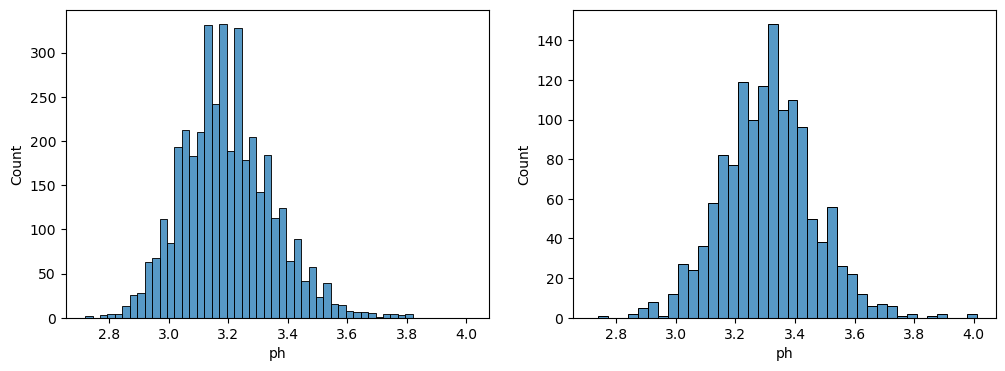

In [587]:
fig, ax = plt.subplots(1, 2, figsize=(12,4), sharex=True)

sns.histplot(wine_w, x='ph', ax=ax[0])
sns.histplot(wine_r, x='ph', ax=ax[1])

In [588]:
print(pg.normality(wine_w.ph))

           W          pval  normal
ph  0.988173  1.051144e-17   False


## Chlorides

<Axes: xlabel='chlorides', ylabel='Count'>

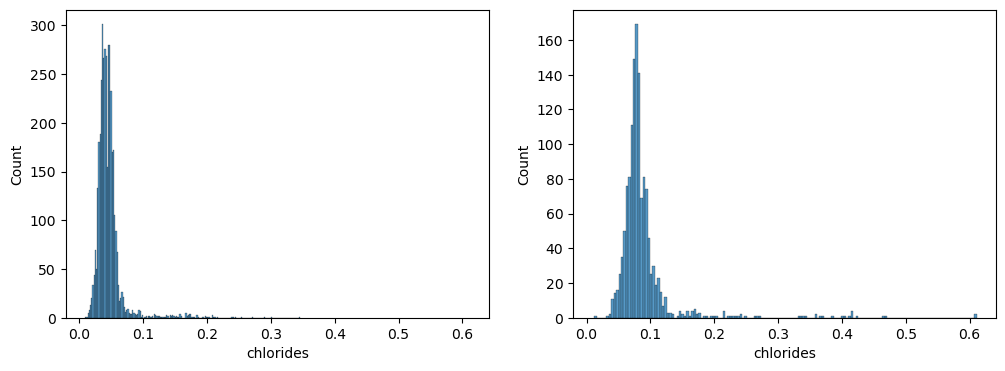

In [589]:
fig, ax = plt.subplots(1, 2, figsize=(12,4), sharex=True)#, sharey=True)

sns.histplot(wine_w, x='chlorides', ax=ax[0])
sns.histplot(wine_r, x='chlorides', ax=ax[1])

## Total Sulfur Dioxide

<Axes: xlabel='total_sulfur_dioxide', ylabel='Count'>

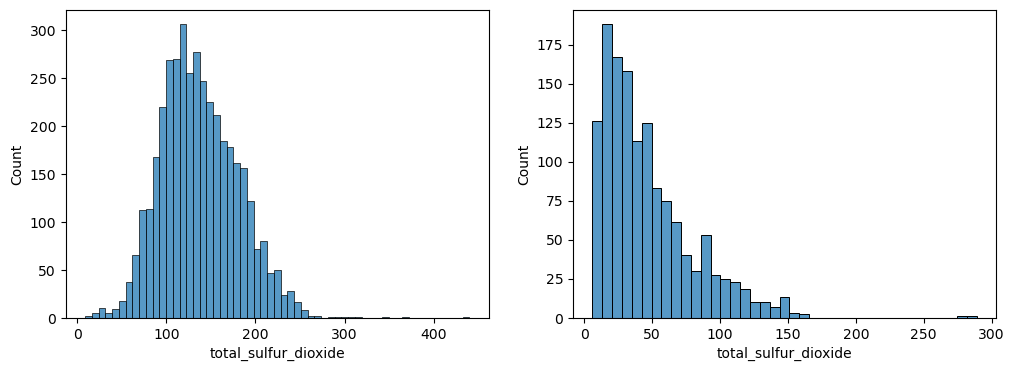

In [590]:
fig, ax = plt.subplots(1, 2, figsize=(12,4))#, sharey=True)

sns.histplot(wine_w, x='total_sulfur_dioxide', ax=ax[0])
sns.histplot(wine_r, x='total_sulfur_dioxide', ax=ax[1])

## Free Sulfur Dioxide

<Axes: xlabel='free_sulfur_dioxide', ylabel='Count'>

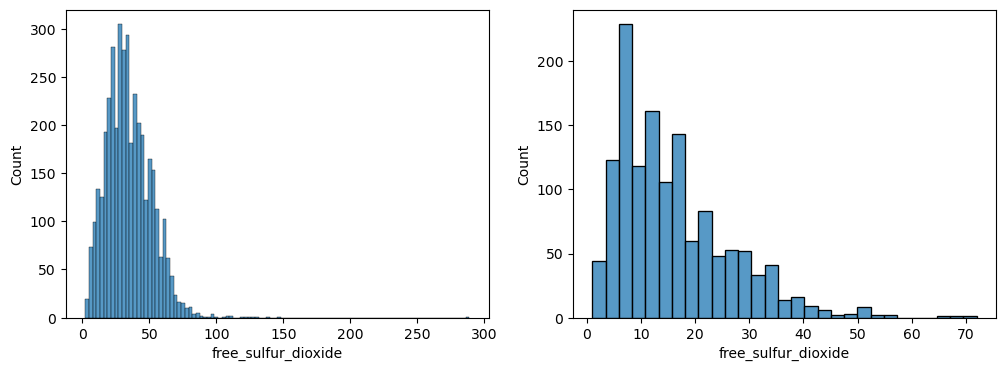

In [591]:
fig, ax = plt.subplots(1, 2, figsize=(12,4))#, sharey=True)

sns.histplot(wine_w, x='free_sulfur_dioxide', ax=ax[0])
sns.histplot(wine_r, x='free_sulfur_dioxide', ax=ax[1])

## Sulphates

<Axes: xlabel='sulphates', ylabel='Count'>

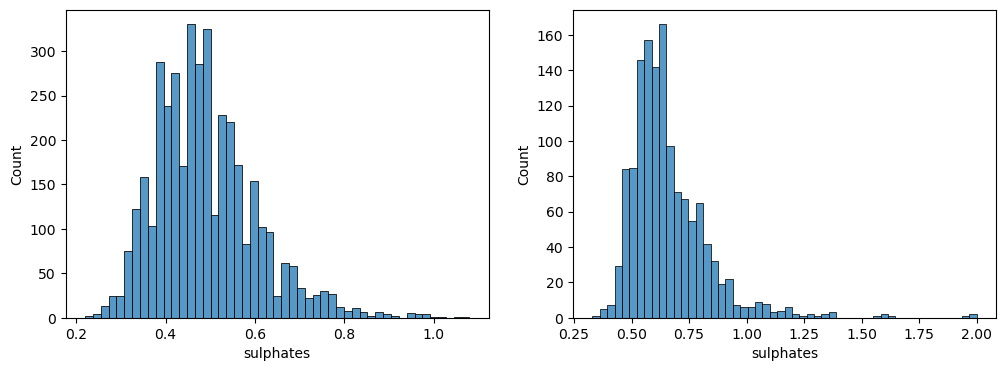

In [592]:
fig, ax = plt.subplots(1, 2, figsize=(12,4))#, sharey=True)

sns.histplot(wine_w, x='sulphates', ax=ax[0])
sns.histplot(wine_r, x='sulphates', ax=ax[1])

## Density

<Axes: xlabel='density', ylabel='Density'>

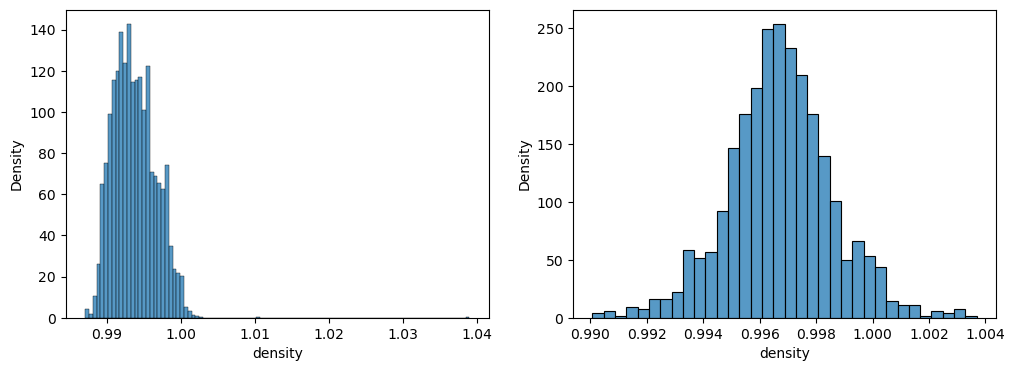

In [593]:
fig, ax = plt.subplots(1, 2, figsize=(12,4))#, sharey=True)

# TODO Why is the plot not normalized?
sns.histplot(x=wine_w.density, stat='density', ax=ax[0])
sns.histplot(x=wine_r.density, stat='density', ax=ax[1])

### Density Outlier

In [594]:
high_density_wines_w = wine_w.loc[wine_w.density.sort_values(ascending=False).index, :].head(10)
high_density_wines_w

,ph,fixed_acidity,volatile_acidity,citric_acid,chlorides,total_sulfur_dioxide,free_sulfur_dioxide,sulphates,residual_sugar,density,alcohol,quality,color,quality_label,total_sulfur_dioxide_above_eu_limit,volatile_acid_above_eu_limit,input_outlier_count
2781,3.39,7.8,0.965,0.60,0.074,160.0,8.0,0.69,65.80,1.03898,11.7,6,white,medium,False,False,5
1653,3.15,7.9,0.330,0.28,0.053,176.0,35.0,0.38,31.60,1.01030,8.8,6,white,medium,False,False,2
3619,3.06,6.8,0.450,0.28,0.031,122.0,27.0,0.42,26.05,1.00295,10.6,6,white,medium,False,False,2
2334,3.44,7.5,0.230,0.35,0.058,212.0,128.0,0.43,17.80,1.00241,8.9,5,white,low,True,False,2
1608,2.98,6.9,0.270,0.49,0.057,235.0,59.0,0.47,23.50,1.00240,8.6,5,white,low,True,False,2
3420,3.01,7.6,0.280,0.49,0.060,145.0,30.0,0.44,20.15,1.00196,8.5,5,white,low,False,False,2
2250,3.08,9.2,0.340,0.54,0.060,235.0,46.0,0.61,17.30,1.00182,8.8,6,white,medium,True,False,1
1958,2.96,7.4,0.320,0.55,0.056,238.0,53.0,0.58,16.60,1.00170,8.7,6,white,medium,True,False,0
1454,2.99,8.3,0.210,0.49,0.054,231.0,50.0,0.54,19.80,1.00120,9.2,5,white,low,True,False,0
2419,3.39,6.1,0.360,0.41,0.070,207.0,67.0,0.53,19.35,1.00118,9.1,5,white,low,False,False,0


In [595]:
wine_w.columns

Index(['ph', 'fixed_acidity', 'volatile_acidity', 'citric_acid', 'chlorides',
       'total_sulfur_dioxide', 'free_sulfur_dioxide', 'sulphates',
       'residual_sugar', 'density', 'alcohol', 'quality', 'color',
       'quality_label', 'total_sulfur_dioxide_above_eu_limit',
       'volatile_acid_above_eu_limit', 'input_outlier_count'],
      dtype='object')

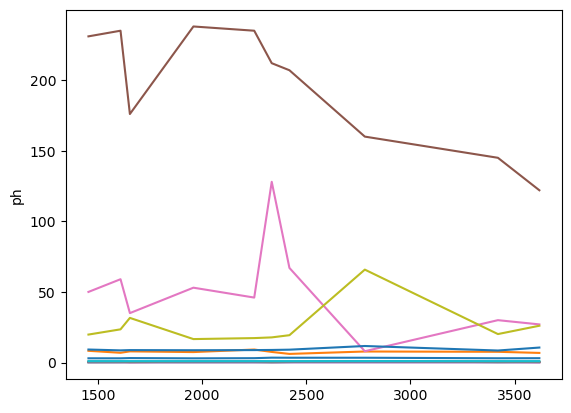

In [596]:
for input in all_inputs:
    sns.lineplot(high_density_wines_w[input])

## Residual Sugar

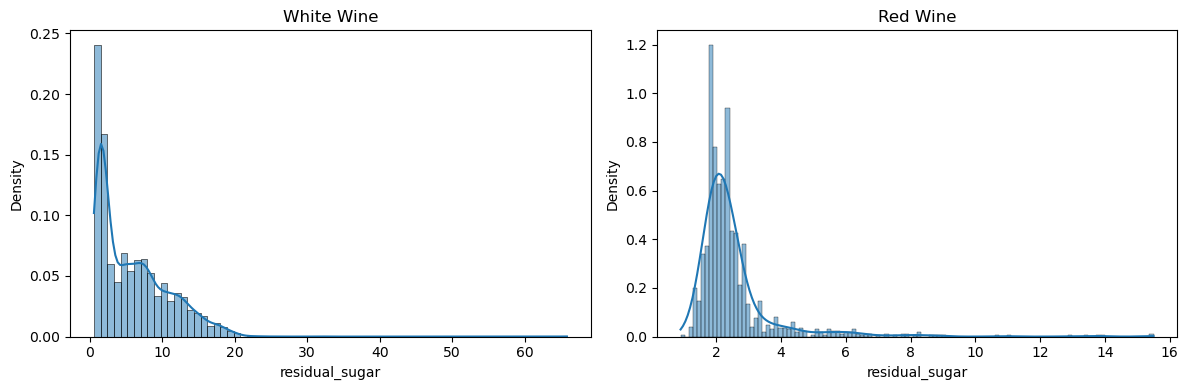

In [597]:
fig, ax = plt.subplots(1, 2, figsize=(12,4))

sns.histplot(wine_w, x='residual_sugar', stat='density', kde=True, ax=ax[0])
sns.histplot(wine_r, x='residual_sugar', stat='density', kde=True, ax=ax[1])

ax[0].set_title('White Wine')

ax[1].set_title('Red Wine')

plt.tight_layout()

- The distribution of Residual Sugar is wider in white wines; the distribution is quite narrow in red wines.
- Red wines have a maximum around 2

## Alcohol

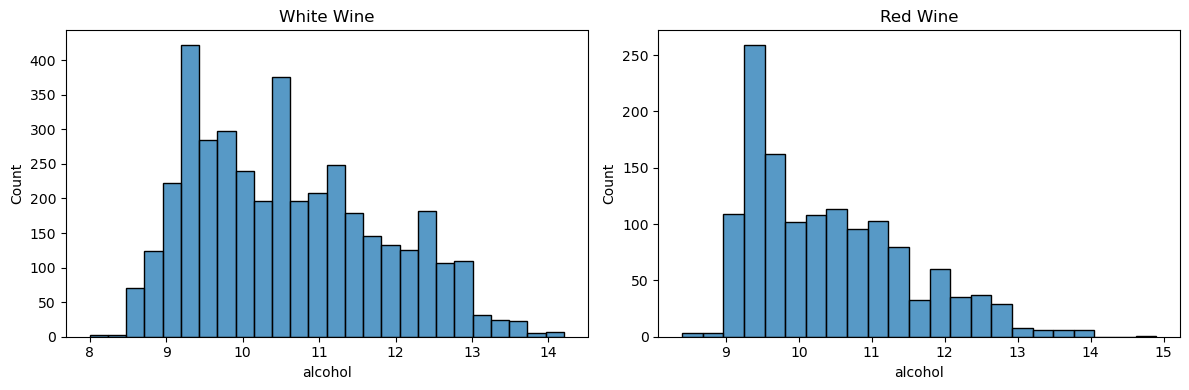

In [598]:
fig, ax = plt.subplots(1, 2, figsize=(12,4))

sns.histplot(wine_w, x='alcohol', ax=ax[0])
sns.histplot(wine_r, x='alcohol', ax=ax[1])

ax[0].set_title('White Wine')

ax[1].set_title('Red Wine')

plt.tight_layout()

## Density vs. Sulphates

<Axes: xlabel='sulphates', ylabel='density'>

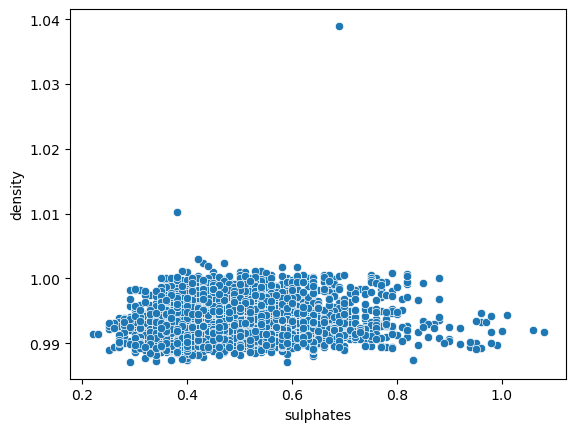

In [599]:
sns.scatterplot(wine_w, y='density', x='sulphates')

## Density vs. Residual Sugar

(0.99, 1.005)

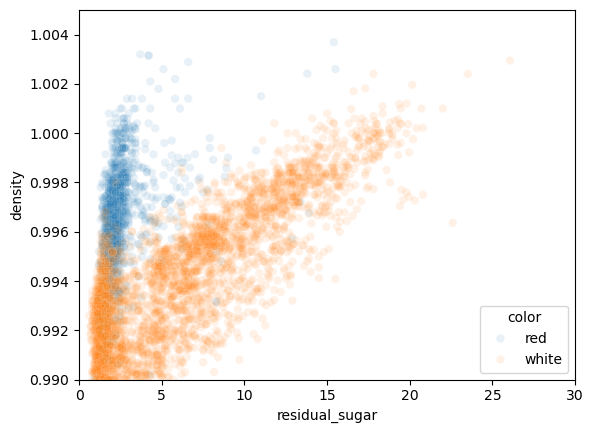

In [600]:
ax = sns.scatterplot(wine, y='density', x='residual_sugar', 
                     hue='color', alpha=0.1
                     )

ax.set_xlim([0, 30])
ax.set_ylim([0.99, 1.005])

(0.98, 1.005)

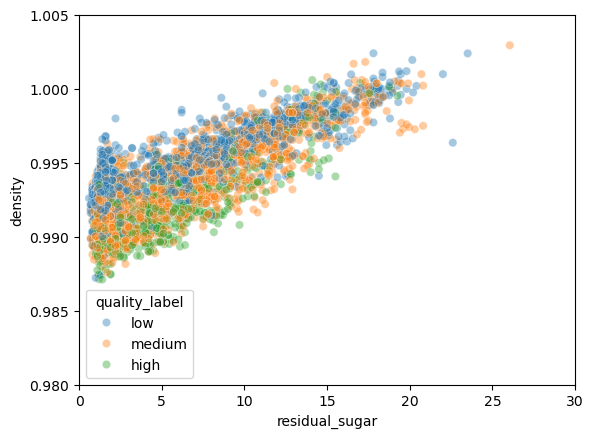

In [601]:
ax = sns.scatterplot(wine_w, y='density', x='residual_sugar', hue='quality_label', alpha=0.4)

ax.set_xlim([0, 30])
ax.set_ylim([0.98, 1.005])

<Axes: xlabel='total_sulfur_dioxide', ylabel='density'>

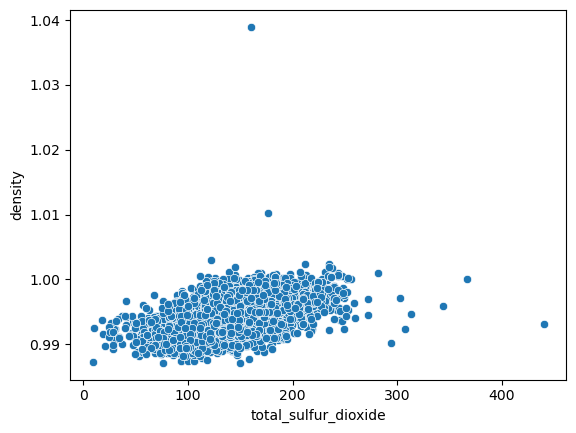

In [602]:
sns.scatterplot(wine_w, y='density', x='total_sulfur_dioxide')

<Axes: xlabel='total_sulfur_dioxide', ylabel='residual_sugar'>

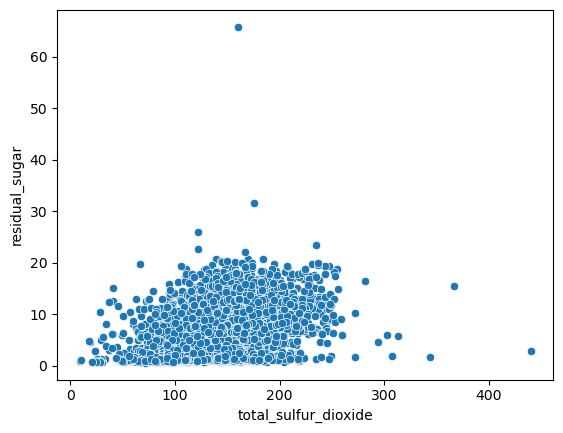

In [603]:
sns.scatterplot(wine_w, y='residual_sugar', x='total_sulfur_dioxide')